In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_unnormalized = 'communities_and_crime_unnormalized/CommViolPredUnnormalizedData.txt'
data = pd.read_csv(data_unnormalized, header = None)
data.head()

0   1   2      3    4      5     6     7      8    \
0  BerkeleyHeightstownship  NJ  39   5320    1  11980  3.10  1.37  91.78   
1           Marpletownship  PA  45  47616    1  23123  2.82  0.80  95.57   
2               Tigardcity  OR   ?      ?    1  29344  2.43  0.74  94.33   
3         Gloversvillecity  NY  35  29443    1  16656  2.40  1.70  97.35   
4              Bemidjicity  MN   7   5068    1  11245  2.76  0.53  89.16   

    9    ...  137      138   139      140  141     142  143    144     145  \
0  6.50  ...   14   114.85   138  1132.08   16  131.26    2  16.41   41.02   
1  3.44  ...   57   242.37   376  1598.78   26  110.55    1   4.25  127.56   
2  3.43  ...  274   758.14  1797  4972.19  136   376.3   22  60.87  218.59   
3  0.50  ...  225  1301.78   716  4142.56   47  271.93    ?      ?  306.64   
4  1.17  ...   91   728.93  1060  8490.87   91  728.93    5  40.05       ?   

       146  
0  1394.59  
1  1955.95  
2  6167.51  
3        ?  
4  9988.79  

[5 rows x 147 columns]

In [3]:
attribute_names = []
with open('communities_and_crime_unnormalized/attribute_names.txt','r') as f:
    t = f.readlines()
    for x in t:
        attribute_names.append(x.split(' ')[1])
        
print (attribute_names)

['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLa

In [4]:
data.columns = attribute_names
data.head()

communityname State countyCode communityCode  fold    pop  \
0  BerkeleyHeightstownship    NJ         39          5320     1  11980   
1           Marpletownship    PA         45         47616     1  23123   
2               Tigardcity    OR          ?             ?     1  29344   
3         Gloversvillecity    NY         35         29443     1  16656   
4              Bemidjicity    MN          7          5068     1  11245   

   perHoush  pctBlack  pctWhite  pctAsian  ...  burglaries  burglPerPop  \
0      3.10      1.37     91.78      6.50  ...          14       114.85   
1      2.82      0.80     95.57      3.44  ...          57       242.37   
2      2.43      0.74     94.33      3.43  ...         274       758.14   
3      2.40      1.70     97.35      0.50  ...         225      1301.78   
4      2.76      0.53     89.16      1.17  ...          91       728.93   

   larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  arsonsPerPop  \
0        138     1132.08         16           131.26       2         16.41   
1        376     1598.78         26           110.55       1          4.25   
2       1797     4972.19        136            376.3      22         60.87   
3        716     4142.56         47           271.93       ?             ?   
4       1060     8490.87         91           728.93       5         40.05   

   violentPerPop  nonViolPerPop  
0          41.02        1394.59  
1         127.56        1955.95  
2         218.59        6167.51  
3         306.64              ?  
4              ?        9988.79  

[5 rows x 147 columns]

In [5]:
data.replace('?',np.nan,inplace = True)

In [6]:
goal_variable = 'violentPerPop'
sum(data[goal_variable].isna())

221

Since there are 221 missing values in the target variable, we are going to drop these 221 instances.

In [7]:
indexes = data[goal_variable].isna()
indexes = np.where(indexes==True)

data.drop(indexes[0], axis = 0, inplace = True)
data.shape

(1994, 147)

Dropping other goal variables

In [8]:
other_goal_variables = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults',
                        'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
                        'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'nonViolPerPop']

len(other_goal_variables)

17

In [9]:
data.drop(other_goal_variables, axis = 1, inplace = True)
data.shape

(1994, 130)

In [10]:
data.reset_index(inplace = True)
data.head()


index            communityname State countyCode communityCode  fold  \
0      0  BerkeleyHeightstownship    NJ         39          5320     1   
1      1           Marpletownship    PA         45         47616     1   
2      2               Tigardcity    OR        NaN           NaN     1   
3      3         Gloversvillecity    NY         35         29443     1   
4      5          Springfieldcity    MO        NaN           NaN     1   

      pop  perHoush  pctBlack  pctWhite  ...  landArea  popDensity  \
0   11980      3.10      1.37     91.78  ...       6.5      1845.9   
1   23123      2.82      0.80     95.57  ...      10.6      2186.7   
2   29344      2.43      0.74     94.33  ...      10.6      2780.9   
3   16656      2.40      1.70     97.35  ...       5.2      3217.7   
4  140494      2.45      2.51     95.65  ...      70.4      1995.7   

   pctUsePubTrans  policCarsAvail  policOperBudget  pctPolicPatrol  gangUnit  \
0            9.63             NaN              NaN             NaN       NaN   
1            3.84             NaN              NaN             NaN       NaN   
2            4.37             NaN              NaN             NaN       NaN   
3            3.31             NaN              NaN             NaN       NaN   
4            0.97             NaN              NaN             NaN       NaN   

   pctOfficDrugUnit  policBudgetPerPop  violentPerPop  
0               0.0                NaN          41.02  
1               0.0                NaN         127.56  
2               0.0                NaN         218.59  
3               0.0                NaN         306.64  
4               0.0                NaN         442.95  

[5 rows x 131 columns]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
data[goal_variable] = data[goal_variable].astype(np.float64)

In [13]:
m = np.min(data[goal_variable])
M = np.max(data[goal_variable])

data[goal_variable] = data[goal_variable].apply(lambda x: (x-m)/(M-m))

In [14]:
true_ys = data[goal_variable].values.copy()

## Keeping apart a test set

In [15]:
from sklearn.model_selection import train_test_split


data, test_data = train_test_split(data, test_size = 0.1, random_state = 42, shuffle = True)

print (data.shape, test_data.shape)

(1794, 131) (200, 131)


## Visualizing Target Variable

In [16]:
data[goal_variable] = data[goal_variable].astype(np.float64)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


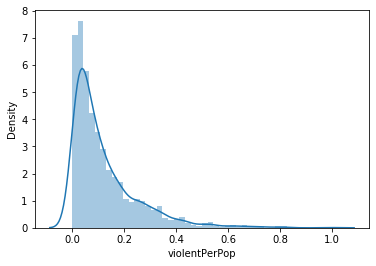

In [17]:
sns.distplot(data[goal_variable])
plt.show()

Descriptive statistics of the target variable

In [18]:
from scipy import stats

y = np.array(data[goal_variable].values, dtype = np.float32)
descriptive = {}

descriptive['min'] = np.min(y)
descriptive['max'] = np.max(y)

descriptive['mean'] = np.mean(y)
descriptive['std'] = np.std(y)
descriptive['median'] = np.median(y)
descriptive['Skewness'] = stats.skew(y)
descriptive['Kurtosis'] = stats.kurtosis(y)

count = 0
l1 = descriptive['mean'] - 3*descriptive['std']
l2 = descriptive['mean'] + 3*descriptive['std']
for value in y:
    if l1<=value<=l2:
        count+=1
        
descriptive['Percentage_within_3_sd'] = count/len(y) * 100

descriptive

{'min': 0.0,
 'max': 1.0,
 'mean': 0.12169641,
 'std': 0.1275846,
 'median': 0.076678365,
 'Skewness': 2.0732293128967285,
 'Kurtosis': 5.653861809910019,
 'Percentage_within_3_sd': 97.88182831661094}

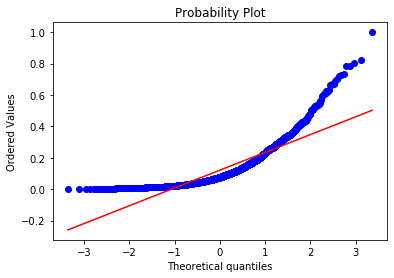

In [19]:
stats.probplot(y, plot = plt)
plt.show()

Clearly, the target variable is not from a normal distribution. Hence, fitting a regression model with the assumption of errors being from the normal distribution is not valid. Further observations from the descriptive statistics include:

1) Fat right tail. Positively skewed.

2) Around 97.89% of the values are within 3 standard deviations of the mean.

3) Since the target variable is not normally distributed and $y = \beta * x  + \epsilon$ and y is not normally distributed. Then, $\epsilon$ will also be not normally distributed. Hence, the assumption of normality of errors in ordinary least square method will not work. So, we should resort to techniques like bootstrapping.

In [20]:
#Keeping true train y values apart
train_y_actual = data[goal_variable].values.copy()
train_y_actual.shape

(1794,)

0.17198268009005804


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


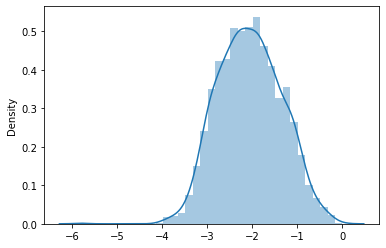

In [21]:
# Box cox transformation
from scipy import stats
delta = 1e-16
fitted_data, fitted_lambda = stats.boxcox(data[goal_variable].values+delta)

print (fitted_lambda)
sns.distplot(fitted_data)

### Box Cox Transformation
Required transformation with $\delta = 1e-16$: $$\frac{(y+\delta)^\lambda - 1}{\lambda}$$

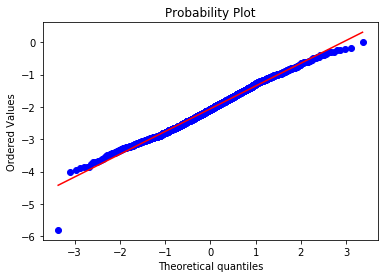

In [22]:
stats.probplot(fitted_data, plot = plt)
plt.show()

In [23]:
y = (np.power((data[goal_variable] + delta),fitted_lambda) - 1)/fitted_lambda

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


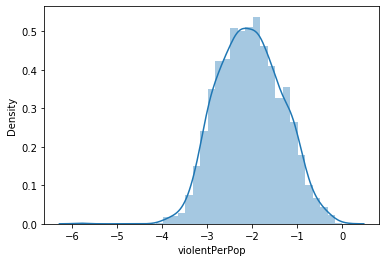

In [24]:
sns.distplot(y)

In [25]:
data[goal_variable] = y

In [26]:
descriptive = {}

descriptive['min'] = np.min(y)
descriptive['max'] = np.max(y)

descriptive['mean'] = np.mean(y)
descriptive['std'] = np.std(y)
descriptive['median'] = np.median(y)
descriptive['Skewness'] = stats.skew(y)
descriptive['Kurtosis'] = stats.kurtosis(y)

count = 0
l1 = descriptive['mean'] - 3*descriptive['std']
l2 = descriptive['mean'] + 3*descriptive['std']
for value in y:
    if l1<=value<=l2:
        count+=1
        
descriptive['Percentage_within_3_sd'] = count/len(y) * 100

descriptive

{'min': -5.8042400587743135,
 'max': 0.0,
 'mean': -2.055575180282578,
 'std': 0.7050454782167697,
 'median': -2.076030817332799,
 'Skewness': 0.016305195966569753,
 'Kurtosis': -0.12702093591111652,
 'Percentage_within_3_sd': 99.94425863991081}

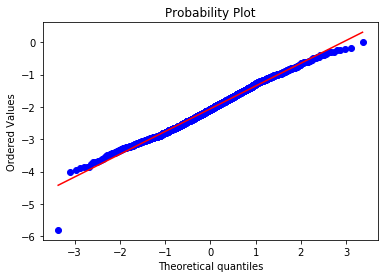

In [27]:
stats.probplot(y, plot = plt)
plt.show()

In [28]:
y = (y - np.mean(y))/np.std(y)
stats.kstest(y, 'norm')

KstestResult(statistic=0.02489050079552821, pvalue=0.21301809458181714)

# Exploratory Data Analysis

## Handling missing values

In [29]:
missing_values = {}
n = data.shape[0]
for variable in data.columns:
    missing = sum(data[variable].isna())
    if missing >  0:
        missing_values[variable] = missing/n * 100
        
missing_values = dict(sorted(missing_values.items(), key = lambda x:x[1], reverse = True))

missing_values = pd.Series(missing_values)
missing_values

numPolice            83.890747
policePerPop         83.890747
policeField          83.890747
policeFieldPerPop    83.890747
policeCalls          83.890747
policCallPerPop      83.890747
policCallPerOffic    83.890747
policePerPop2        83.890747
racialMatch          83.890747
pctPolicWhite        83.890747
pctPolicBlack        83.890747
pctPolicHisp         83.890747
pctPolicAsian        83.890747
pctPolicMinority     83.890747
officDrugUnits       83.890747
numDiffDrugsSeiz     83.890747
policAveOT           83.890747
policCarsAvail       83.890747
policOperBudget      83.890747
pctPolicPatrol       83.890747
gangUnit             83.890747
policBudgetPerPop    83.890747
communityCode        58.751394
countyCode           58.584169
otherPerCap           0.055741
dtype: float64

There is one variable 'otherPerCap' which has about 5% missing values. 'countyCode' and 'communityCode' has around 59% missing values. There are 22 other variables which have around 84% missing values. Keeping 'otherPerCap' we drop all the other variables as they have significant percentage of missing values.

In [30]:
to_drop = list(missing_values.keys())
to_drop.remove('otherPerCap')

data.drop(to_drop,axis = 1,inplace = True)
data.shape

(1794, 107)

Checking the variable 'otherPerCap'

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


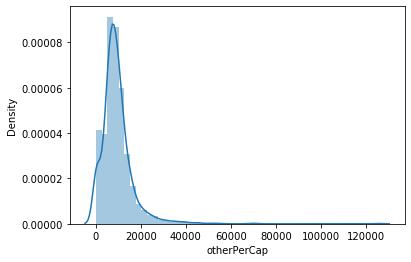

In [31]:
sns.distplot(data['otherPerCap'])

In [32]:
data['otherPerCap'].median()

8158.0

Since, the variable looks skewed, we impute the missing values with the median instead of the mean.

In [33]:
data['otherPerCap'].fillna(data['otherPerCap'].median(), inplace = True)

Now, the variables 'otherPerCap' and 'violentPerPop' are numeric variables. However, by default, they are represented as the datatype 'object' in the dataset. So, we convert these variables into numeric type.

In [34]:
data[goal_variable] = data[goal_variable].astype(np.float64)
data['otherPerCap'] = data['otherPerCap'].astype(np.int64)

In [35]:
numeric_data = data._get_numeric_data()
numeric_data.head()

index  fold    pop  perHoush  pctBlack  pctWhite  pctAsian  pctHisp  \
247     277     2  36955      4.10      3.54     63.92      7.84    74.86   
210     234     2  15616      2.83      0.79     96.23      2.50     1.90   
1778   1985     9  75695      2.55     38.28     57.57      1.52     3.15   
1418   1583     8  49256      2.55      0.11     96.67      0.44     0.66   
23       27     1  88693      2.70      2.92     87.36      2.82    13.97   

      pct12-21  pct12-29  ...  pctForeignBorn  pctBornStateResid  \
247      18.71     35.04  ...           37.17              47.92   
210      10.82     23.03  ...            6.01              54.63   
1778     15.71     31.36  ...            3.46              55.65   
1418     13.98     26.81  ...            1.23              78.91   
23       13.77     30.92  ...            9.71              45.45   

      pctSameHouse-5  pctSameCounty-5  pctSameState-5  landArea  popDensity  \
247            53.77            87.77           89.79       3.6     10219.9   
210            42.40            56.97           82.95      39.2       398.2   
1778           46.81            72.30           78.50      42.1      1799.7   
1418           51.20            77.75           93.49      25.2      1953.7   
23             35.36            77.14           83.16      14.9      5943.0   

      pctUsePubTrans  pctOfficDrugUnit  violentPerPop  
247             5.22              0.00      -0.981322  
210             1.55              0.00      -3.115020  
1778            1.22              1.82      -0.788824  
1418            0.13              0.00      -2.927140  
23              2.17              0.00      -1.471062  

[5 rows x 105 columns]

In [36]:
non_numeric = list(set(data.columns) - set(numeric_data.columns))

In [37]:
data[non_numeric].head()

State     communityname
247     CA      LaPuentecity
210     NJ   Raritantownship
1778    NC  Fayettevillecity
1418    ND      Bismarckcity
23      CA       ElCajoncity

In [38]:
'''fig, axs = plt.subplots(2,1,figsize = (10,15))

sns.boxplot(x = 'communityname', y = 'violentPerPop', data = data, ax = axs[0])
sns.boxplot(x = 'State', y = 'violentPerPop', data = data, ax = axs[1])'''

"fig, axs = plt.subplots(2,1,figsize = (10,15))\n\nsns.boxplot(x = 'communityname', y = 'violentPerPop', data = data, ax = axs[0])\nsns.boxplot(x = 'State', y = 'violentPerPop', data = data, ax = axs[1])"

We see that there are many possible values for each category variable with some of them even having only one instance. So, they are not ideal explanatory variables and hence , we can safely drop these variable in our model building.

In [39]:
data.drop(non_numeric, axis = 1, inplace = True)
data.shape

(1794, 105)

In [40]:
y = data[goal_variable].values

X = data.drop(goal_variable, axis = 1)
X.shape

(1794, 104)

In [41]:
X.head()

index  fold    pop  perHoush  pctBlack  pctWhite  pctAsian  pctHisp  \
247     277     2  36955      4.10      3.54     63.92      7.84    74.86   
210     234     2  15616      2.83      0.79     96.23      2.50     1.90   
1778   1985     9  75695      2.55     38.28     57.57      1.52     3.15   
1418   1583     8  49256      2.55      0.11     96.67      0.44     0.66   
23       27     1  88693      2.70      2.92     87.36      2.82    13.97   

      pct12-21  pct12-29  ...  persHomeless  pctForeignBorn  \
247      18.71     35.04  ...             1           37.17   
210      10.82     23.03  ...             0            6.01   
1778     15.71     31.36  ...            29            3.46   
1418     13.98     26.81  ...             2            1.23   
23       13.77     30.92  ...            76            9.71   

      pctBornStateResid  pctSameHouse-5  pctSameCounty-5  pctSameState-5  \
247               47.92           53.77            87.77           89.79   
210               54.63           42.40            56.97           82.95   
1778              55.65           46.81            72.30           78.50   
1418              78.91           51.20            77.75           93.49   
23                45.45           35.36            77.14           83.16   

      landArea  popDensity  pctUsePubTrans  pctOfficDrugUnit  
247        3.6     10219.9            5.22              0.00  
210       39.2       398.2            1.55              0.00  
1778      42.1      1799.7            1.22              1.82  
1418      25.2      1953.7            0.13              0.00  
23        14.9      5943.0            2.17              0.00  

[5 rows x 104 columns]

In [42]:
X.drop('index',axis = 1, inplace = True)

Histogram of the feature variables

## First 30 variables

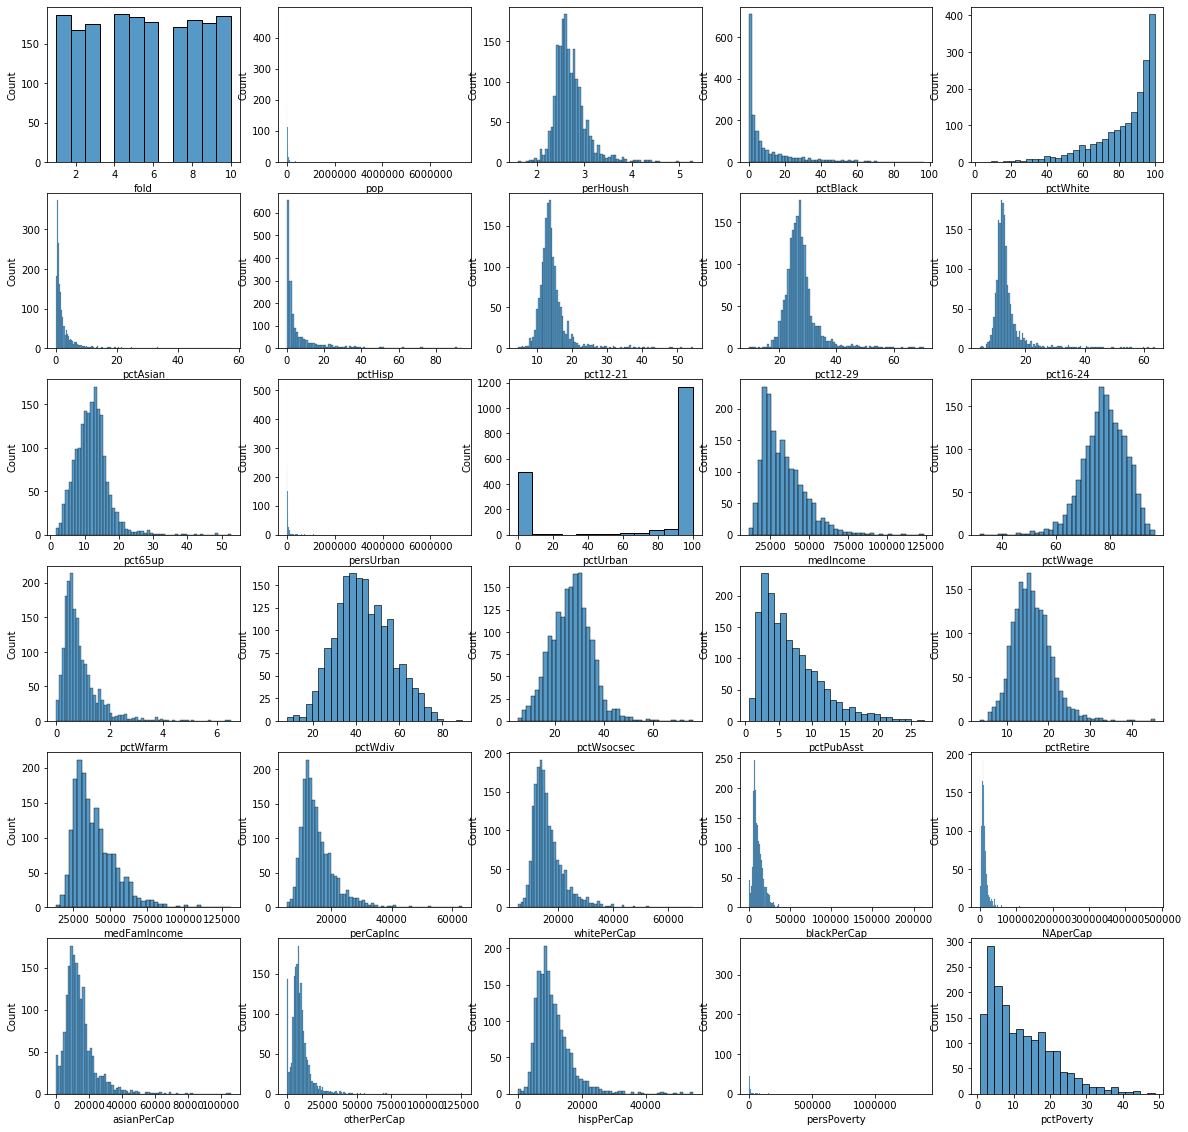

In [43]:
fig, axs = plt.subplots(6,5,figsize = (20,20))

i = 0
j = 0

for variable in X.columns[:30]:
    sns.histplot(X[variable], ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j =0

### Feature Transformation

For the variables 'asianPerCap', 'otherPerCap', 'medIncome', 'medFamincome', 'whitePerCap', 'hispPerCap', we see that the distribution is similar to the initial target value distribution. So, we can try a log transformations on these variables. 

In [44]:
transform = ['asianPerCap', 'otherPerCap', 'medIncome', 'medFamIncome', 'whitePerCap', 'hispPerCap']

for v in transform:
    X[v] = X[v].apply(lambda x: np.log(x+15))

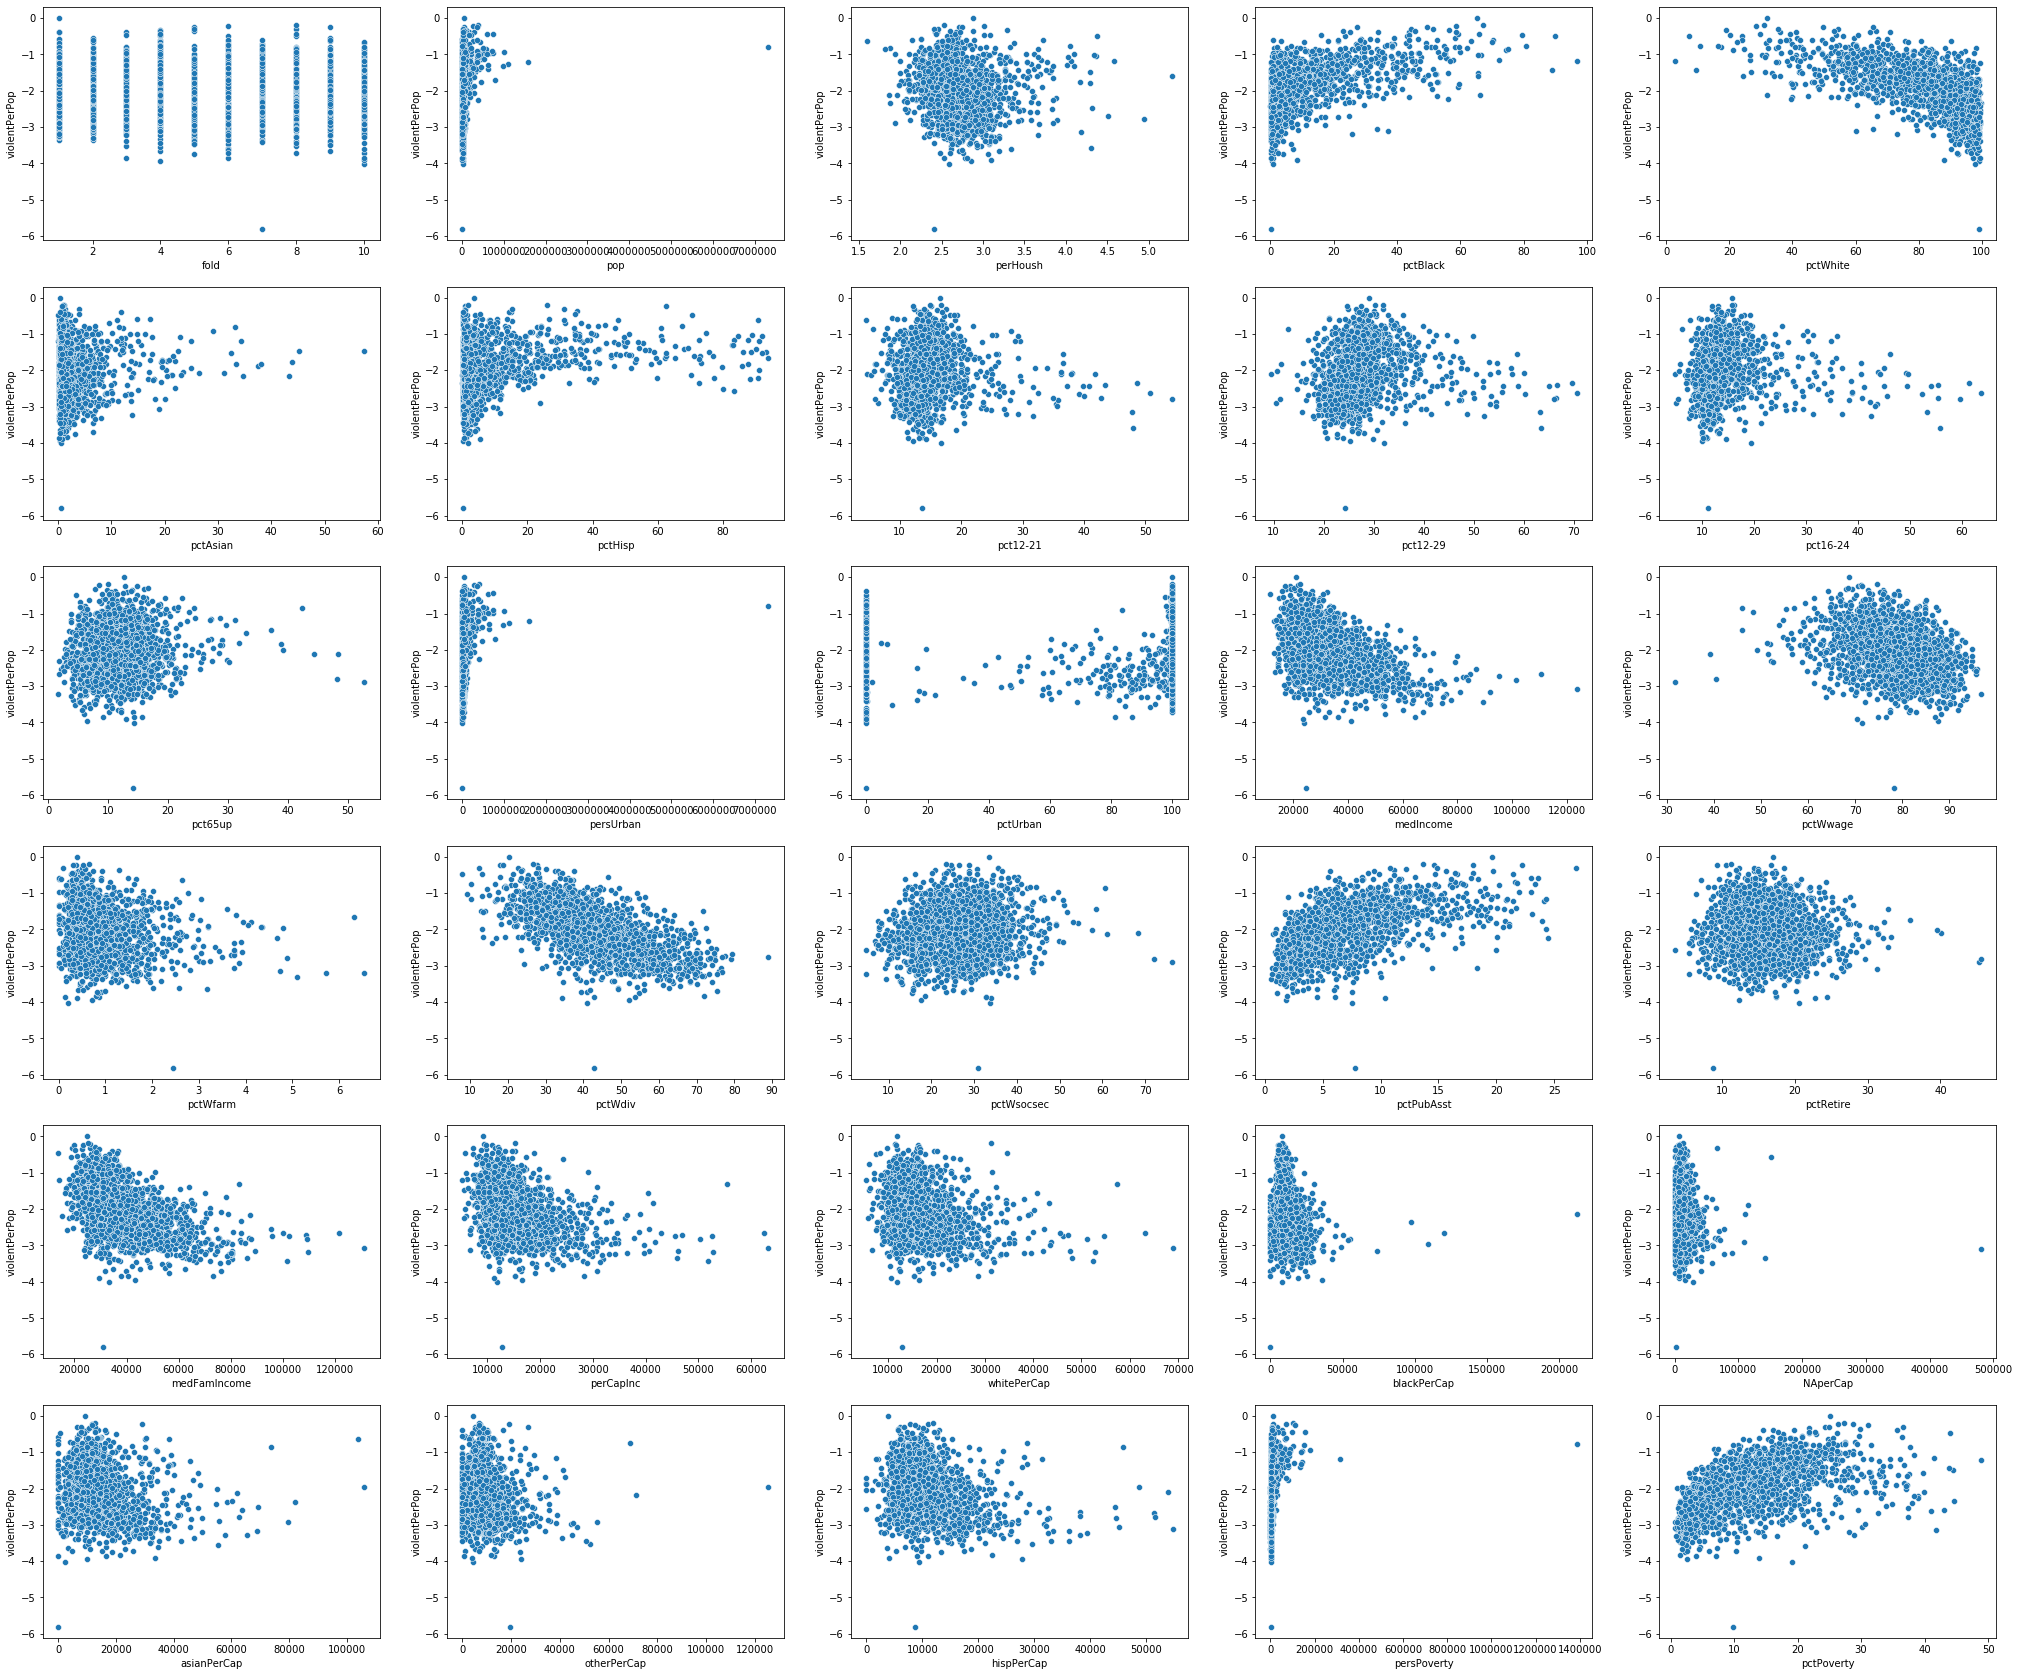

In [45]:
fig, axs = plt.subplots(6,5, figsize = (35,30))
i = 0
j = 0
for variable in X.columns[:30]:
    sns.scatterplot(x = variable, y = goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j=0
        
plt.savefig('first30.png')

We can see the following observations from the plot:

1) fold is a categorical variable among.

2) There are some variables which does not seem to show any relation with the goal variable from the plot. However, this may be due to present of outliers which changes the scale of these variables. Such variables are: ['pop', 'persUrban', 'NAperCap', 'persPoverty']

3) Linear Relationship:
    a) pctWhite seems to have a linear association with the target variable with negative slope.
    b) pctPoverty seems to have a linear association with the target variable and positive slope. However, the variance seems to be increasing also. 
    
4) Non Linear Relationship: A lot of the variables seem to show a non-linear trend (Mostly quadratic).

Checking important variables among these 30 variables and comparing with the intuition we get from the graphs!

pctWhite        0.332660
pctPoverty      0.308223
persPoverty     0.305017
pctWdiv         0.281350
pctPubAsst      0.264457
pctBlack        0.259317
medFamIncome    0.186315
blackPerCap     0.154189
medIncome       0.146350
pctHisp         0.124912
dtype: float64


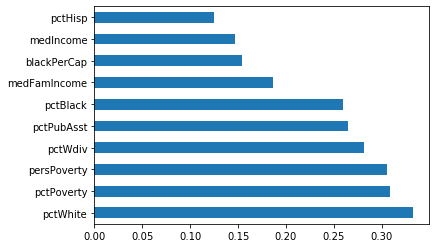

In [46]:
from sklearn.feature_selection import mutual_info_regression
t = np.array(X)

mutual_info = mutual_info_regression(t[:,:30], y = data[goal_variable])
variables = X.columns[:30]
mutual_info = dict(zip(variables, mutual_info))
mutual_info = dict(sorted(mutual_info.items(), key = lambda x:x[1], reverse = True))

mutual_info = pd.Series(mutual_info)
mutual_info.nlargest(10).plot(kind = 'barh')

print (mutual_info.nlargest(10))
plt.show()

The variables 'pctWhite', 'pctPoverty', 'persPoverty', 'pctWdiv', 'pctPubAsst' and 'pctBlack' have a mutual information score above 20%. We are going to consider these variables in our model building.

We again plot the target variable with these variables to see what feature transformation may be needed.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

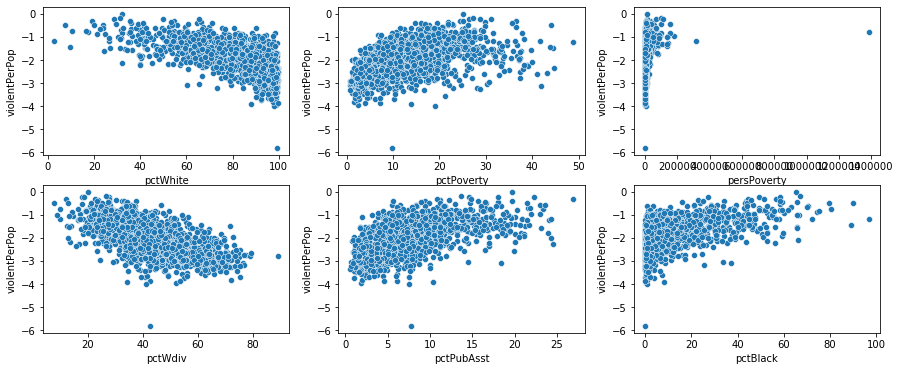

In [47]:
features1 = [ 'pctWhite', 'pctPoverty', 'persPoverty', 'pctWdiv', 'pctPubAsst','pctBlack']

fig, axs = plt.subplots(2, 3, figsize = (15,6))
i = 0
j = 0
for feature in features1:
    sns.scatterplot(feature, goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==3:
        i+=1
        j=0
    

We see that 'persPoverty' has a higher mutual information score. But from the graphs it is clear that we need to transform the variable into a relevant scale as some outliers are there. Transforming 'persPoverty' by taking the 4th root.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


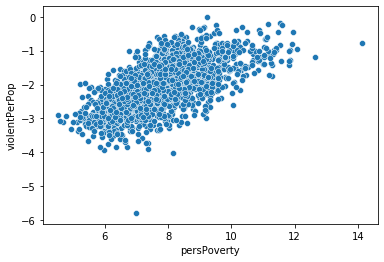

In [48]:
data['persPoverty'] = data['persPoverty'].apply(lambda x:np.log(x+15))

sns.scatterplot('persPoverty', goal_variable, data = data)
plt.show()

Now we can see the linear relationship with the target variable.

## Variables 30-60

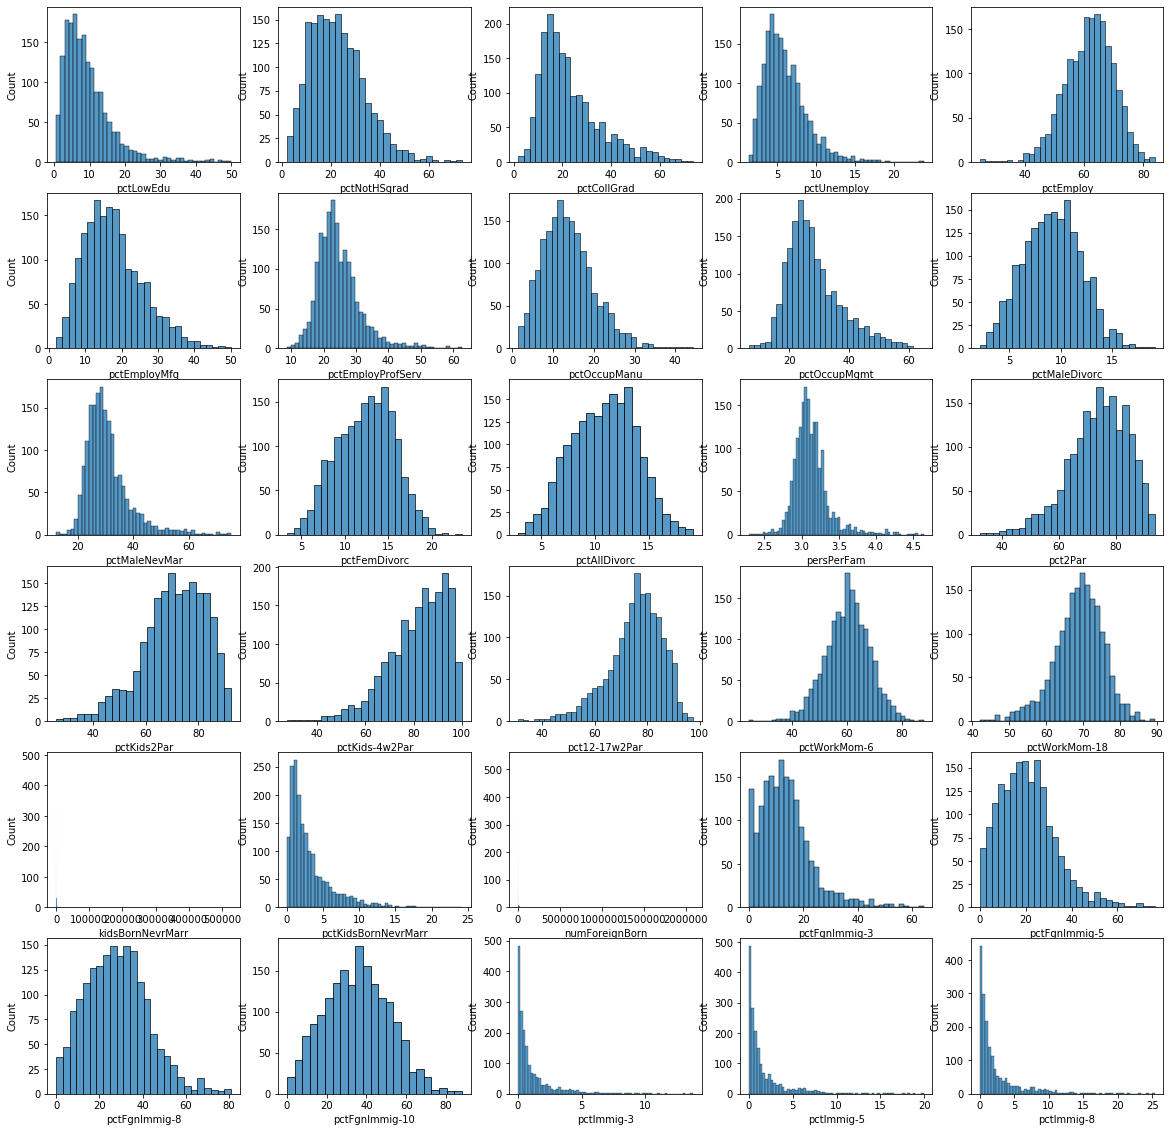

In [49]:
fig, axs = plt.subplots(6,5,figsize = (20,20))

i = 0
j = 0

for variable in X.columns[30:60]:
    sns.histplot(X[variable], ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j =0

The variables 'kidsBornNevrMarr' and 'numForeignBorn' is obviously affected by outliers. We first transform the variables.

In [50]:
data['kidsBornNevrMarr'] = data['kidsBornNevrMarr'].apply(lambda x:np.log(x+15))
data['numForeignBorn'] = data['numForeignBorn'].apply(lambda x:np.log(x+15))


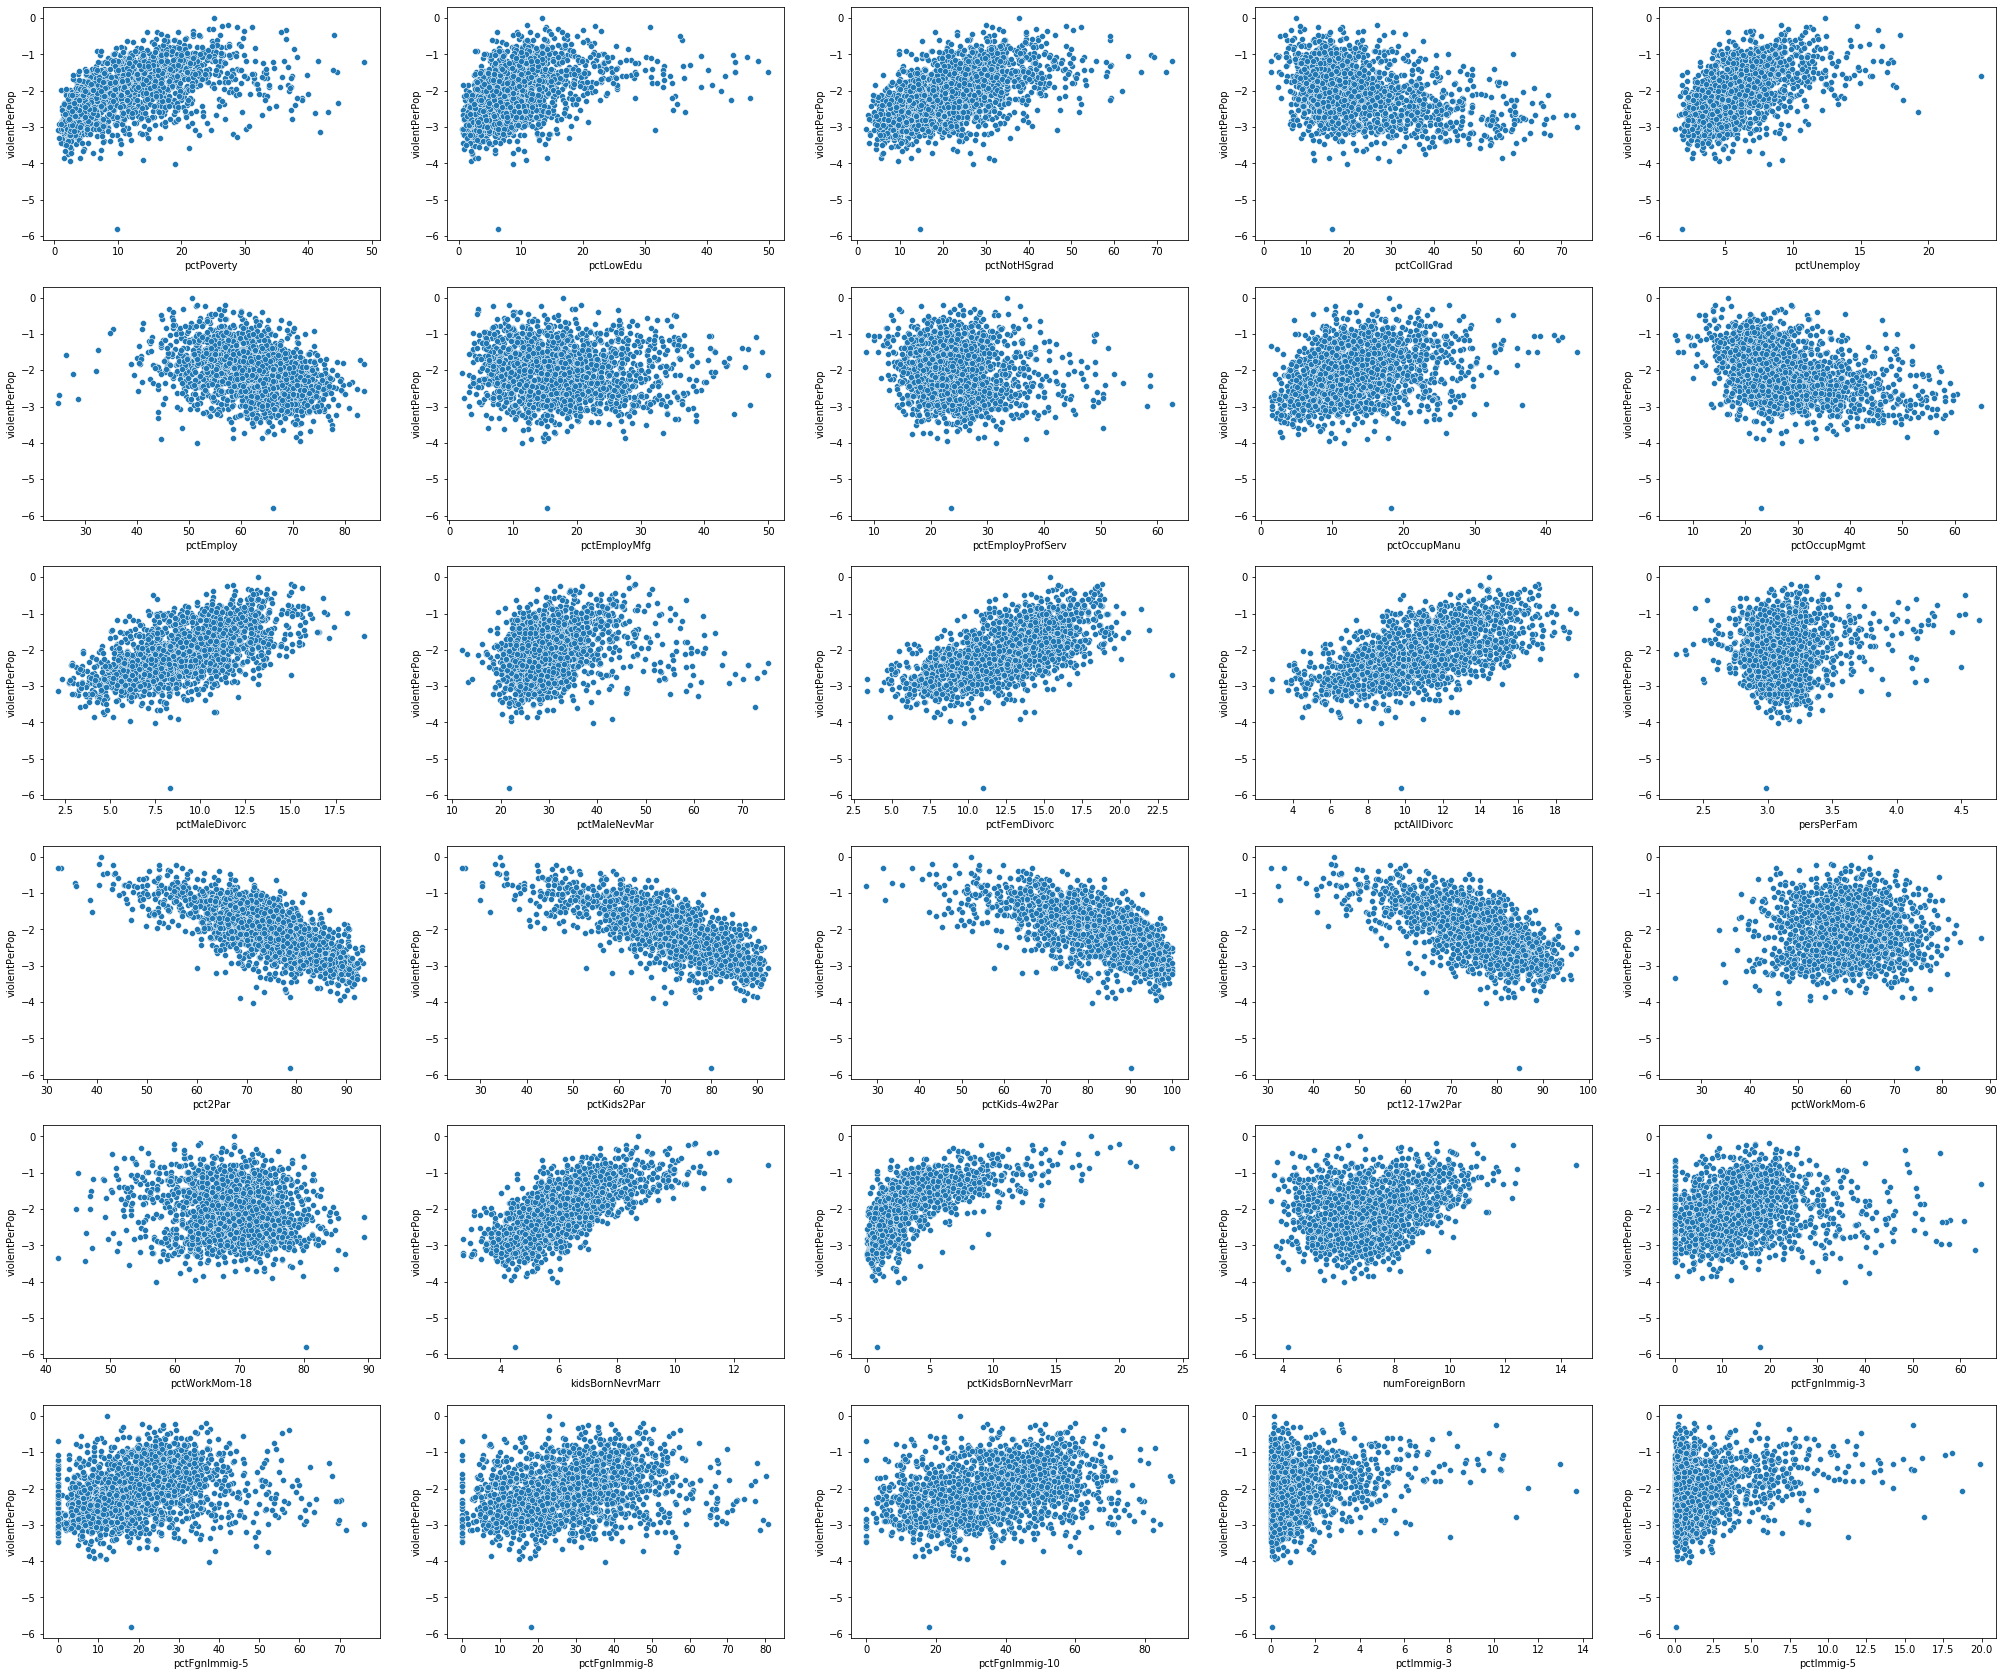

In [51]:
fig, axs = plt.subplots(6,5, figsize = (35,30))
i = 0
j = 0
for variable in data.columns[30:60]:
    sns.scatterplot(x = variable, y = goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j=0
        
plt.savefig('30_60.png')

### Feature importance for variables 30-60

pctKids2Par            0.465975
pctKidsBornNevrMarr    0.418241
pct2Par                0.417230
kidsBornNevrMarr       0.375487
pctKids-4w2Par         0.355120
pct12-17w2Par          0.329395
pctFemDivorc           0.274315
pctAllDivorc           0.258337
pctMaleDivorc          0.221878
pctUnemploy            0.179459
dtype: float64


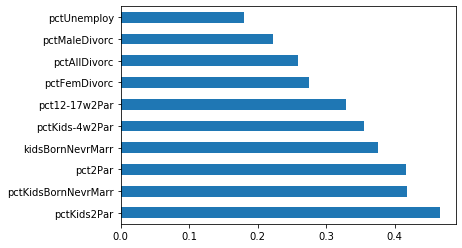

In [52]:
t = np.array(X)

mutual_info = mutual_info_regression(t[:,30:60], y = data[goal_variable])
variables = X.columns[30:60]

mutual_info = dict(zip(variables, mutual_info))
mutual_info = dict(sorted(mutual_info.items(), key = lambda x:x[1], reverse = True))

mutual_info = pd.Series(mutual_info)
mutual_info.nlargest(10).plot(kind = 'barh')

print (mutual_info.nlargest(10))
plt.show()

Variables 'pctKids2Par', 'pctKidsBornNevrMarr', 'pct2Par', 'kidsBornNevrMarr', 'pctKids-4w2Par', 'pct12-17w2Par',
'pctFemDivorc', 'pctAllDivorc', 'pctMaleDivorc' have mutual information score of above 20% with the goal variable.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

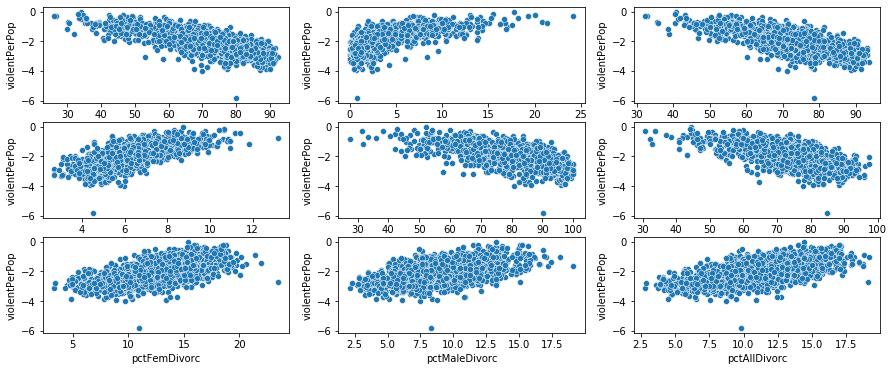

In [53]:
features2 = ['pctKids2Par', 'pctKidsBornNevrMarr', 'pct2Par', 'kidsBornNevrMarr', 'pctKids-4w2Par', 
             'pct12-17w2Par', 'pctFemDivorc', 'pctMaleDivorc','pctAllDivorc']

fig, axs = plt.subplots(3,3, figsize = (15,6))

i = 0
j = 0

for feature in features2:
    sns.scatterplot(feature, goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==3:
        i+=1
        j=0

## Variables 60-90

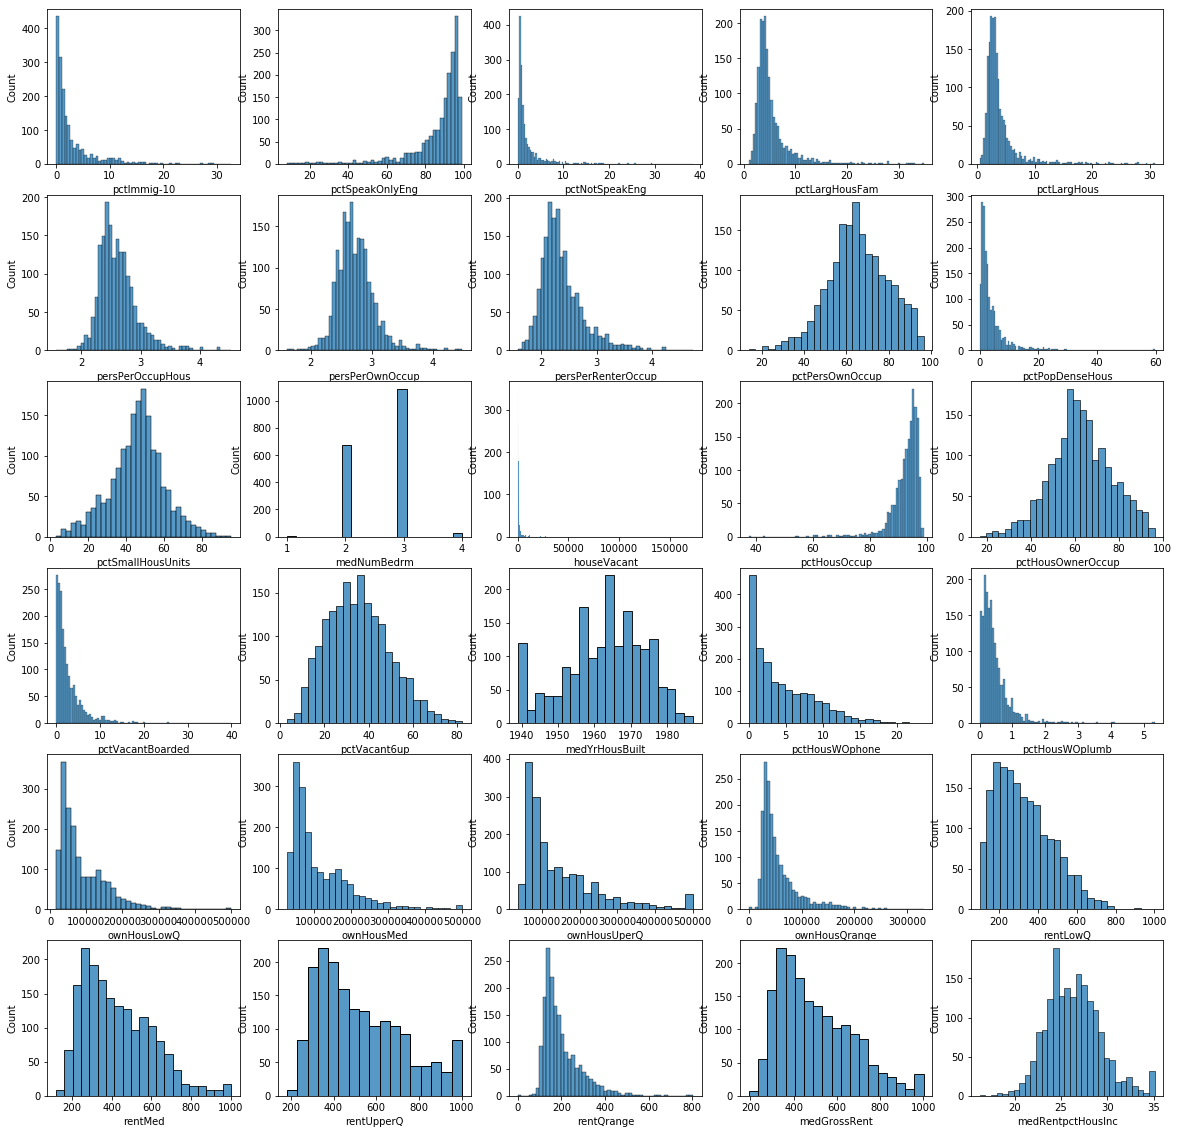

In [54]:
fig, axs = plt.subplots(6,5,figsize = (20,20))

i = 0
j = 0

for variable in X.columns[60:90]:
    sns.histplot(X[variable], ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j =0

The variable 'houseVacant' clearly has outliers causing problems with the scale in the values. So we take a 4th root of this variable. For the variables: 'ownHousUpperQ', 'ownHousMed' and 'ownHousMed' also, the distribution is similar to the initial goal variable. We also take a 4th root to deal with the scale.

In [55]:
data['houseVacant'] = data['houseVacant'].apply(lambda x:np.log(x+15))
data['ownHousLowQ'] = data['ownHousLowQ'].apply(lambda x:np.log(x+15))
data['ownHousMed'] = data['ownHousMed'].apply(lambda x:np.log(x+15))
data['ownHousUperQ'] = data['ownHousUperQ'].apply(lambda x:np.log(x+15))

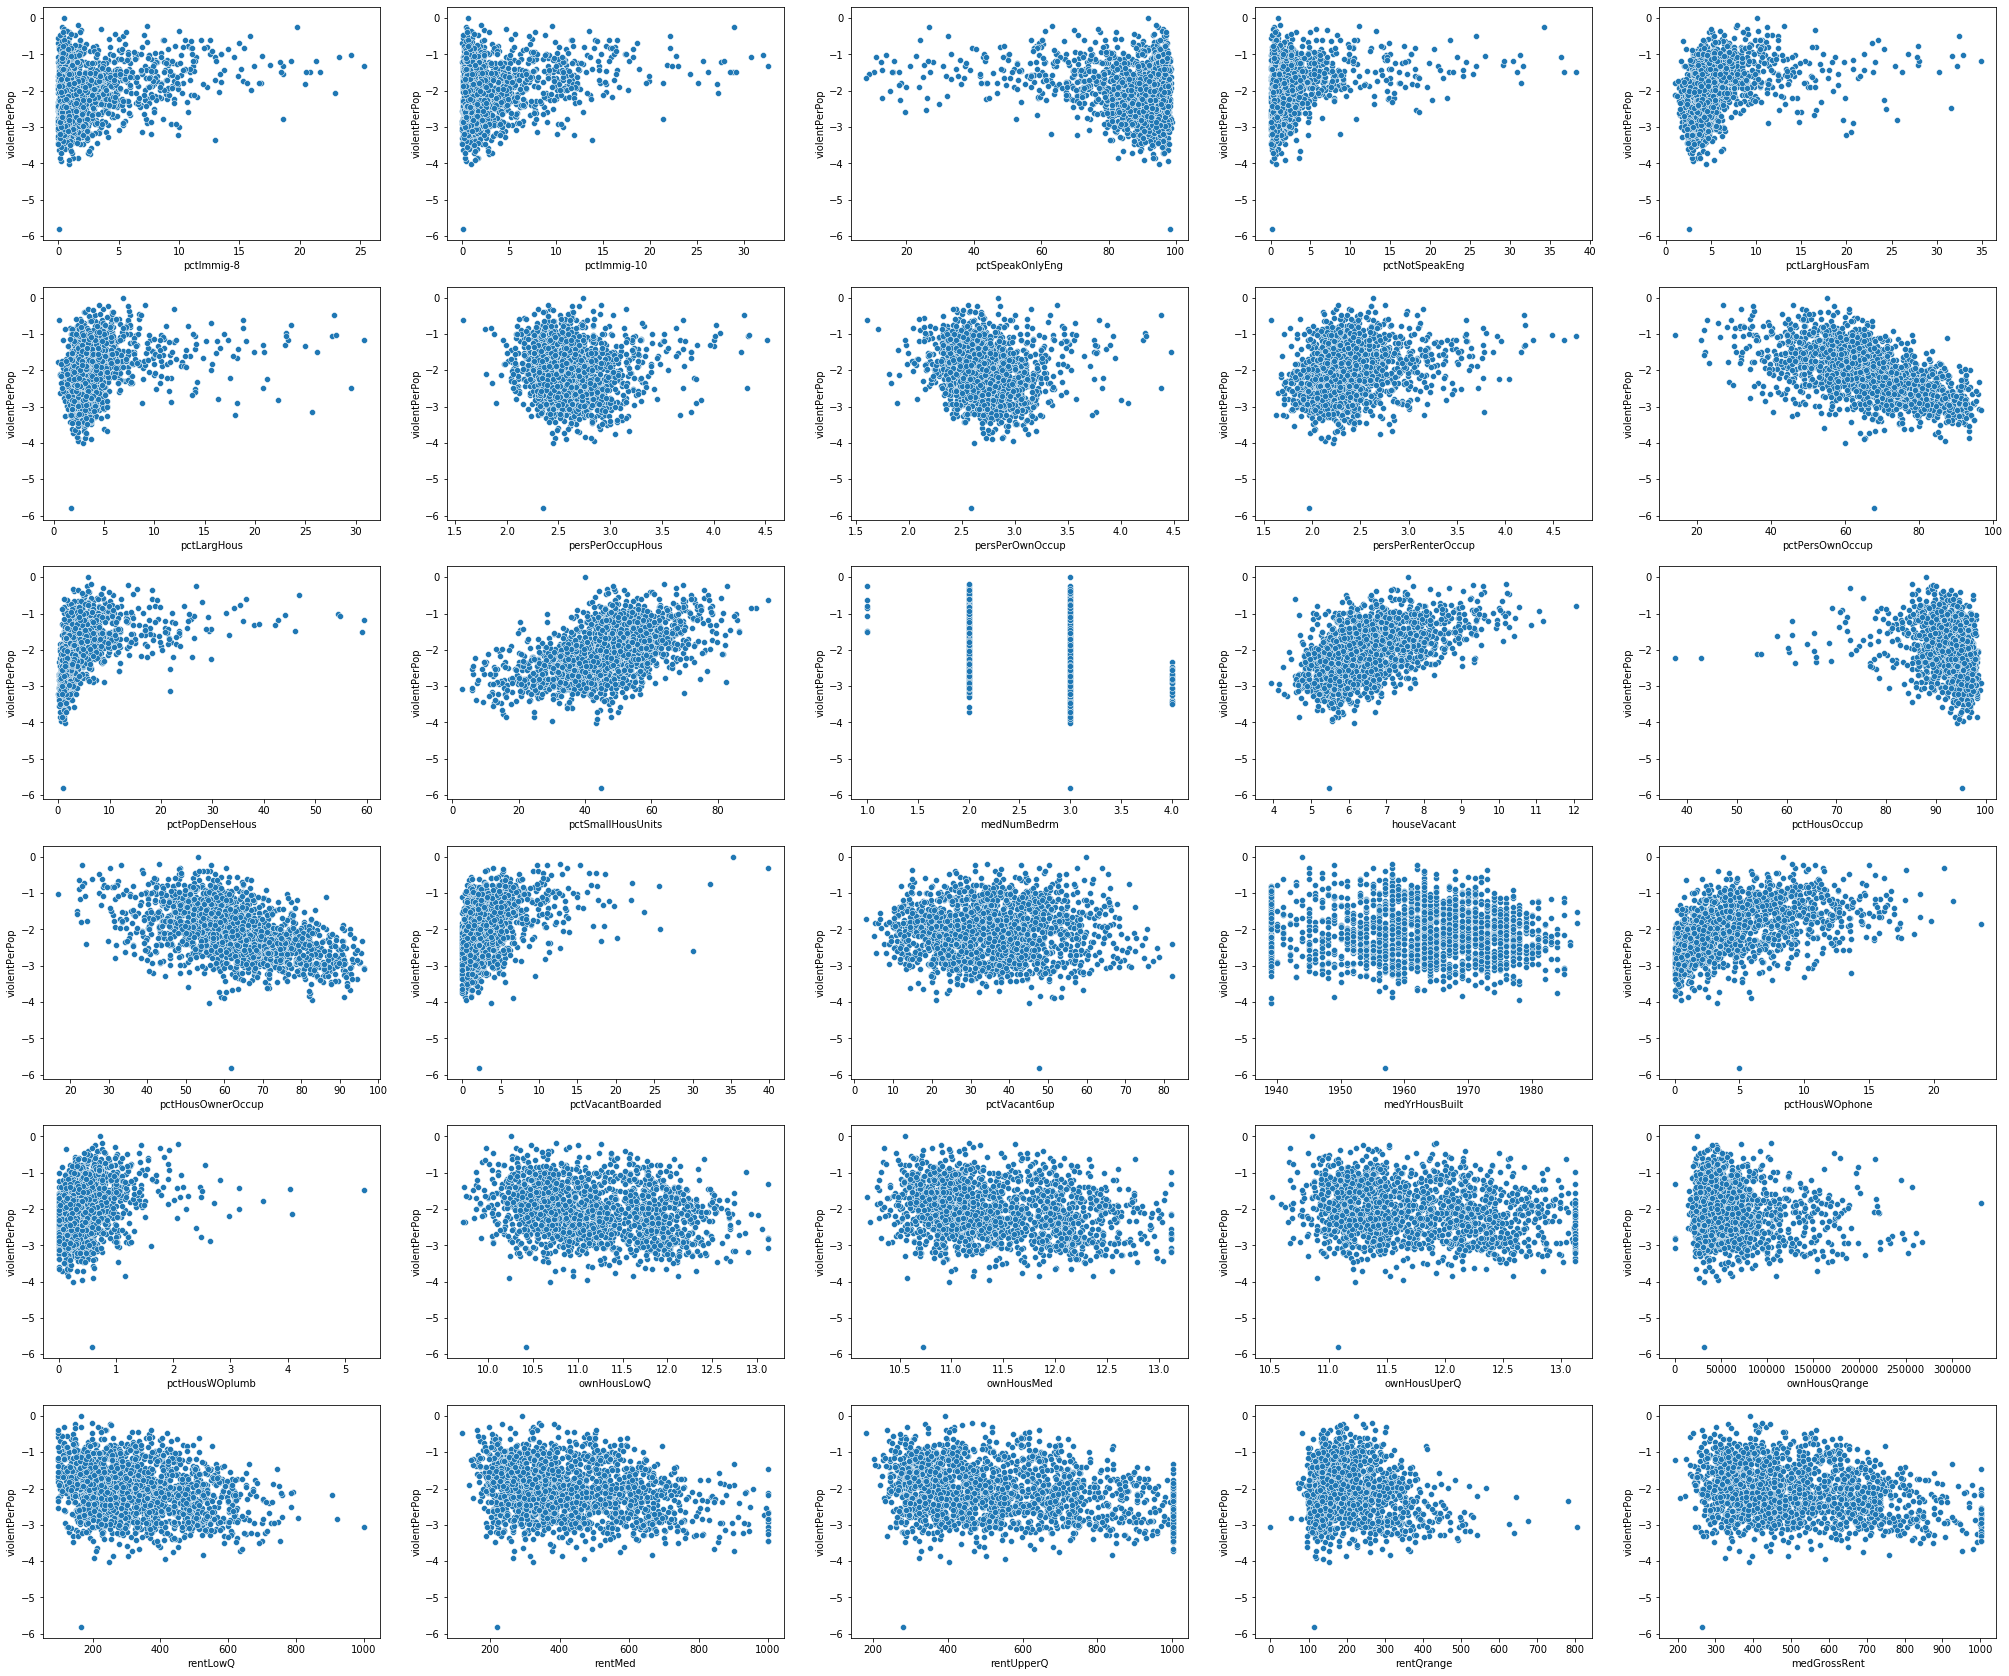

In [56]:
fig, axs = plt.subplots(6,5, figsize = (35,30))
i = 0
j = 0
for variable in data.columns[60:90]:
    sns.scatterplot(x = variable, y = goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j=0
        
plt.savefig('60_90.png')

## Feature Importance

pctPopDenseHous      0.296670
pctPersOwnOccup      0.227018
pctHousWOphone       0.219310
pctHousOwnerOccup    0.197449
pctSmallHousUnits    0.175614
houseVacant          0.163838
pctVacantBoarded     0.113928
pctHousOccup         0.105225
medNumBedrm          0.091175
pctLargHousFam       0.090790
dtype: float64


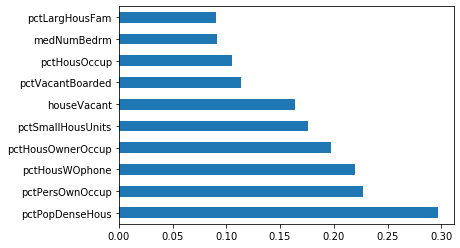

In [57]:
t = np.array(X)

mutual_info = mutual_info_regression(t[:,60:90], y = data[goal_variable])
variables = X.columns[60:90]

mutual_info = dict(zip(variables, mutual_info))
mutual_info = dict(sorted(mutual_info.items(), key = lambda x:x[1], reverse = True))

mutual_info = pd.Series(mutual_info)
mutual_info.nlargest(10).plot(kind = 'barh')

print (mutual_info.nlargest(10))
plt.show()

Only 'pctPopDenseHous' has a feature importance of above 25%. However, we are also going to consider the variables 'pctPersOwnOccup' and 'pctHousWOphone' with information scores of about 21% as they seem to be important from the graph.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

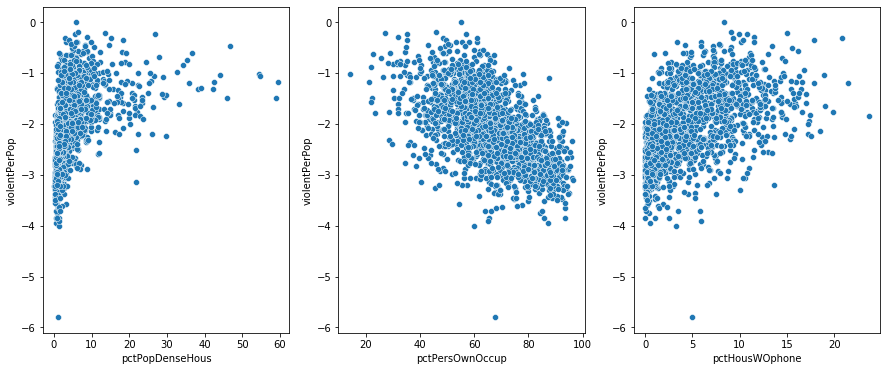

In [58]:
features3 = ['pctPopDenseHous', 'pctPersOwnOccup','pctHousWOphone']

fig, axs = plt.subplots(1,3,figsize = (15,6))

for i, feature in enumerate(features3):
    sns.scatterplot(feature, goal_variable, data = data, ax = axs[i])

In [59]:
len(X.columns)

103

## Variables 90-103

In [60]:
'''
fig, axs = plt.subplots(3,5,figsize = (15,10))

i = 0
j = 0

for variable in X.columns[90:104]:
    sns.histplot(X[variable], ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j =0'''

'\nfig, axs = plt.subplots(3,5,figsize = (15,10))\n\ni = 0\nj = 0\n\nfor variable in X.columns[90:104]:\n    sns.histplot(X[variable], ax = axs[i,j])\n    j+=1\n    if j==5:\n        i+=1\n        j =0'

Presence of outliers affect the scale in variables 'landArea', 'persEmergShelt', 'persHomeless'. For these variables we take the 4th root. 
For variables 'popDensity', 'pctUsePubTrans' we take the 4th and 2nd root respectively.

In [61]:
data['landArea'] = data['landArea'].apply(lambda x:np.log(x+15))
data['persEmergShelt'] = data['persEmergShelt'].apply(lambda x:np.log(x+15))
data['persHomeless'] = data['persHomeless'].apply(lambda x:np.log(x+15))

In [62]:
data['popDensity'] = data['popDensity'].apply(lambda x:np.log(x+15))
data['pctUsePubTrans'] = data['pctUsePubTrans'].apply(lambda x:np.log(x+15))

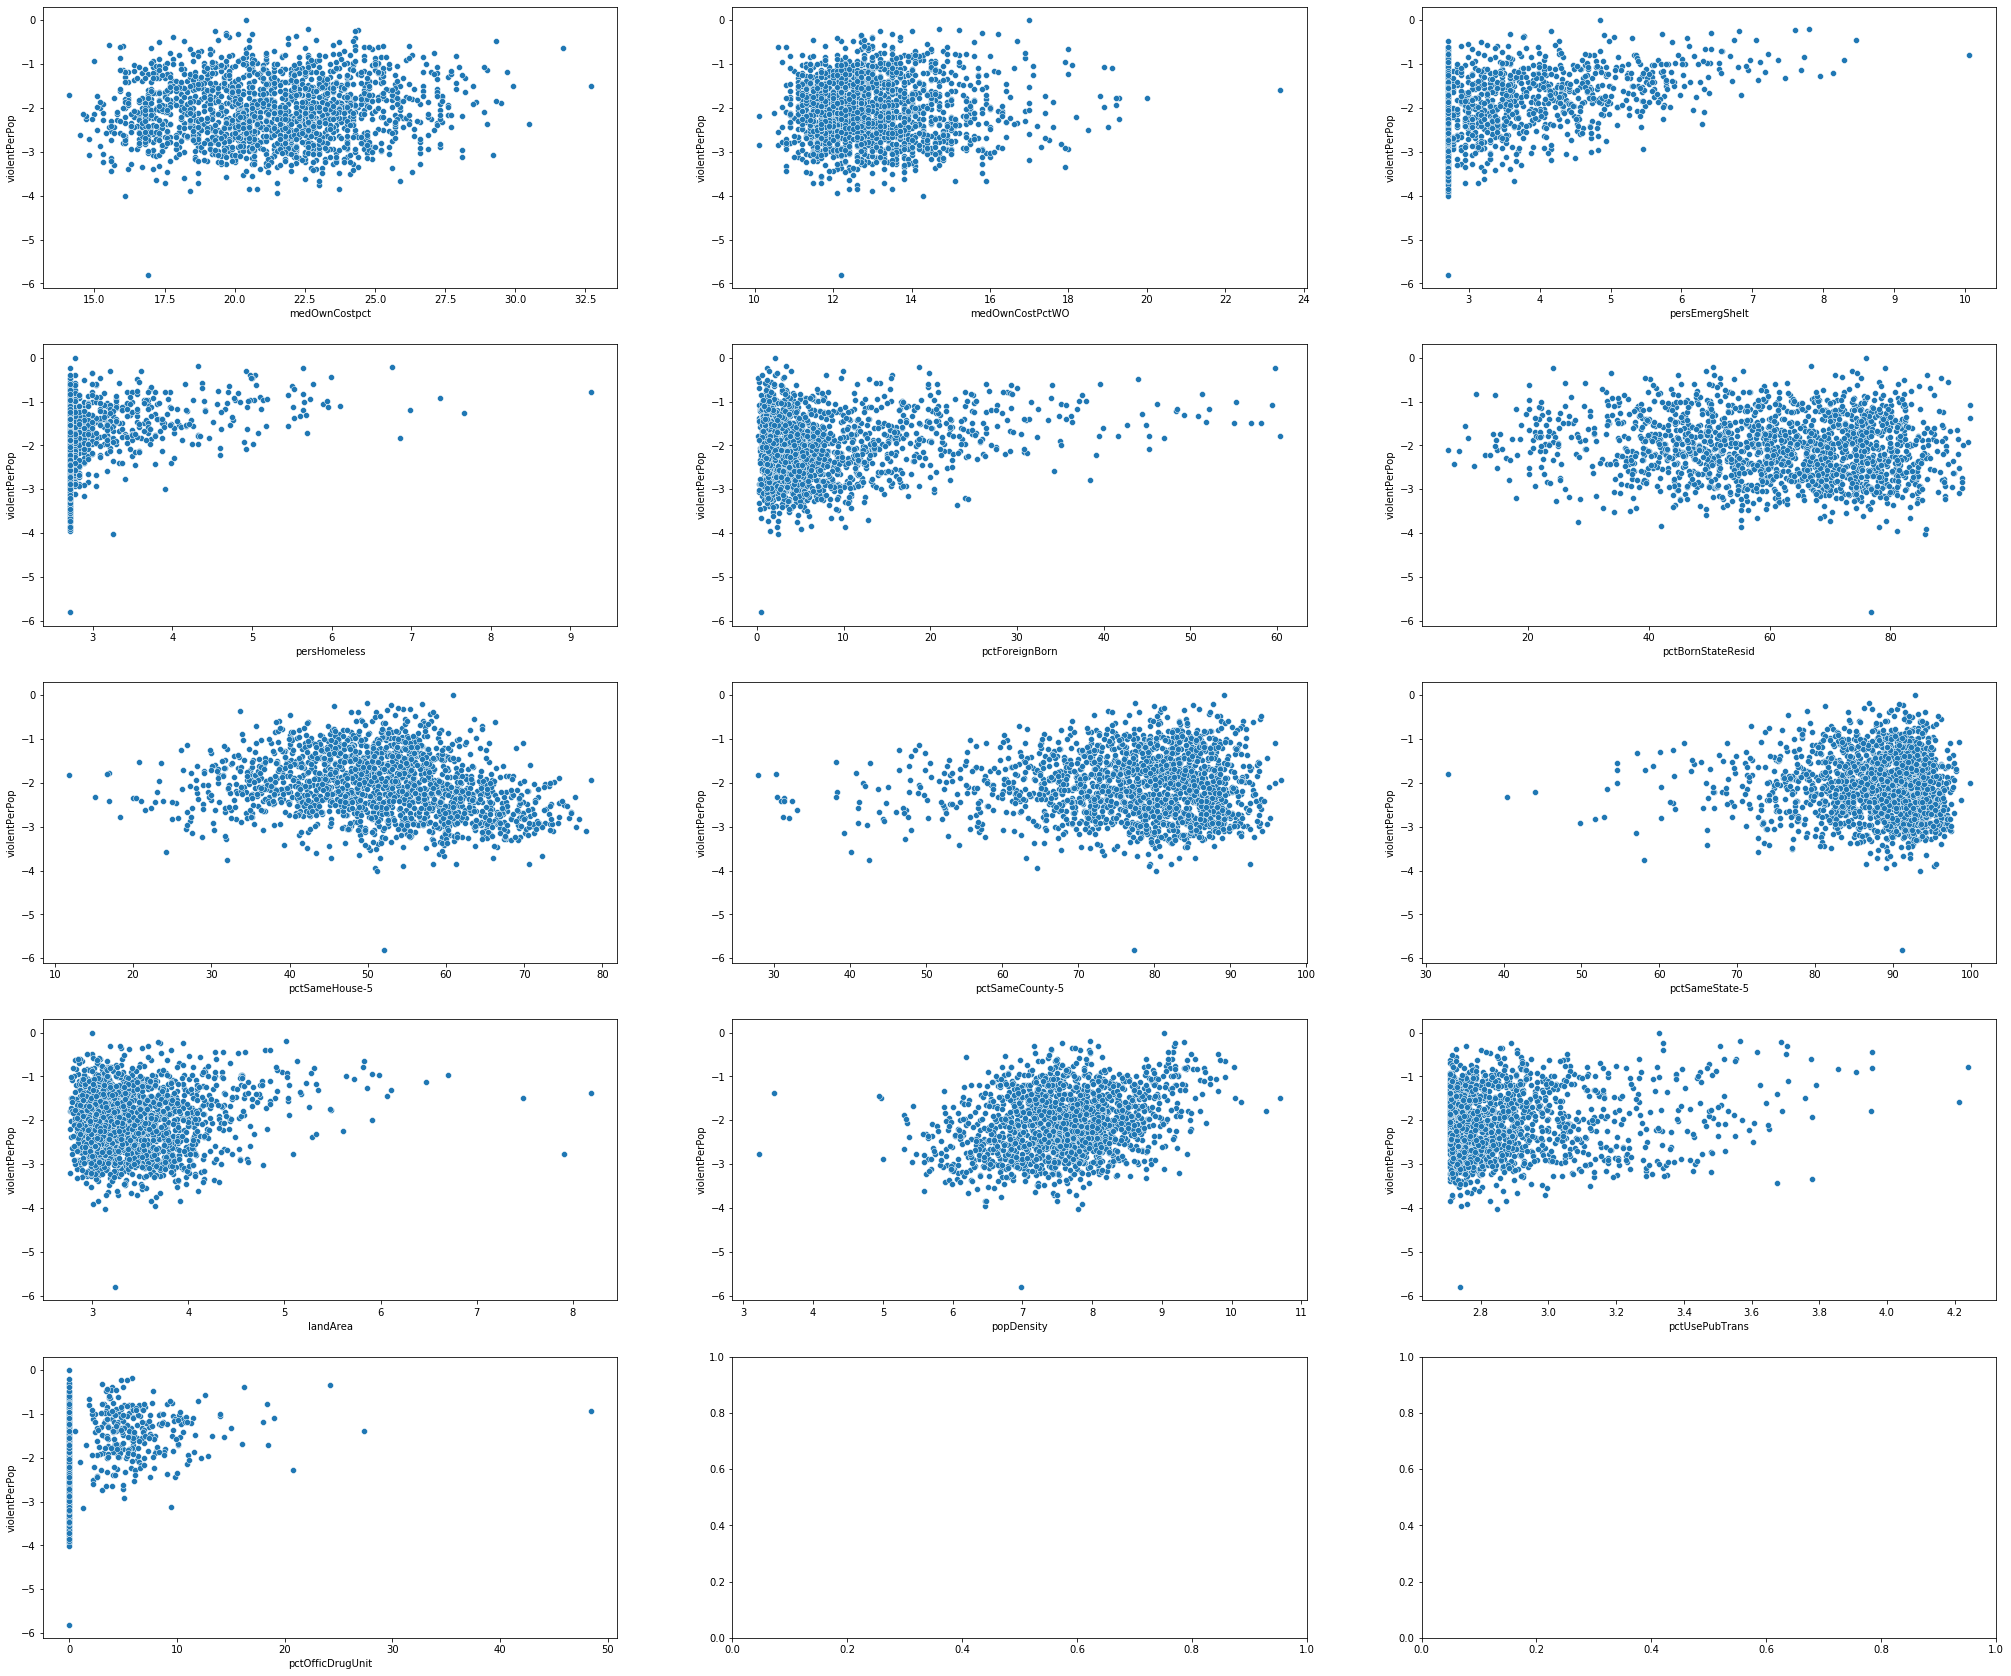

In [63]:
fig, axs = plt.subplots(5,3, figsize = (35,30))
i = 0
j = 0
for variable in X.columns[90:]:
    sns.scatterplot(x = variable, y = goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==3:
        i+=1
        j=0
        
plt.savefig('90_103.png')

## Feature Importance

persHomeless        0.119787
persEmergShelt      0.111317
pctSameHouse-5      0.101856
pctOfficDrugUnit    0.070656
popDensity          0.063658
pctForeignBorn      0.054518
pctSameCounty-5     0.037321
pctUsePubTrans      0.029112
landArea            0.012907
pctSameState-5      0.012170
dtype: float64


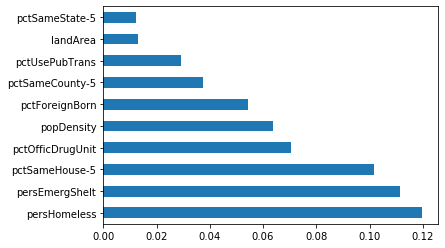

In [64]:
t = np.array(X)

mutual_info = mutual_info_regression(t[:,90:], y = data[goal_variable])
variables = X.columns[90:]

mutual_info = dict(zip(variables, mutual_info))
mutual_info = dict(sorted(mutual_info.items(), key = lambda x:x[1], reverse = True))

mutual_info = pd.Series(mutual_info)
mutual_info.nlargest(10).plot(kind = 'barh')

print (mutual_info.nlargest(10))
plt.show()

Since none of the variables from 90-103 have a mutual information score of above 20% we do not consider these variables.

In [65]:
features = features1 + features2 + features3
len(features)

18

## Checking multi-collinearity

### Variation Inflation Factor

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [67]:
X = data[features]

In [68]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature           VIF
0              pctWhite    219.746708
1            pctPoverty     26.405101
2           persPoverty    589.828363
3               pctWdiv     47.745080
4            pctPubAsst     14.589231
5              pctBlack     13.947854
6           pctKids2Par   2745.931068
7   pctKidsBornNevrMarr     19.191751
8               pct2Par   3988.032991
9      kidsBornNevrMarr    365.213322
10       pctKids-4w2Par    502.209444
11        pct12-17w2Par    396.114773
12         pctFemDivorc   6542.119437
13        pctMaleDivorc   3193.632556
14         pctAllDivorc  18487.050379
15      pctPopDenseHous      8.128135
16      pctPersOwnOccup     89.453780
17       pctHousWOphone      9.647310


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [69]:
features.remove('pctAllDivorc')
features.remove('pctFemDivorc')
features.remove('pct2Par')
features.remove('pctKids2Par')

In [70]:
vif_data = pd.DataFrame() 
X = data[features]
vif_data["feature"] = X.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature         VIF
0              pctWhite  204.082905
1            pctPoverty   25.699569
2           persPoverty  571.357738
3               pctWdiv   45.262917
4            pctPubAsst   13.711015
5              pctBlack   12.627970
6   pctKidsBornNevrMarr   18.674158
7      kidsBornNevrMarr  350.689811
8        pctKids-4w2Par  279.088126
9         pct12-17w2Par  258.824977
10        pctMaleDivorc   27.882200
11      pctPopDenseHous    7.173620
12      pctPersOwnOccup   69.750515
13       pctHousWOphone    8.994445


In [71]:
features.remove('persPoverty')
features.remove('pctKids-4w2Par')
features.remove('pct12-17w2Par')

In [72]:
vif_data = pd.DataFrame() 
X = data[features]
vif_data["feature"] = X.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature         VIF
0              pctWhite  111.825252
1            pctPoverty   15.505008
2               pctWdiv   39.431724
3            pctPubAsst   12.836761
4              pctBlack    9.761364
5   pctKidsBornNevrMarr   12.966988
6      kidsBornNevrMarr   50.725933
7         pctMaleDivorc   26.105666
8       pctPopDenseHous    3.338228
9       pctPersOwnOccup   58.610853
10       pctHousWOphone    8.731533


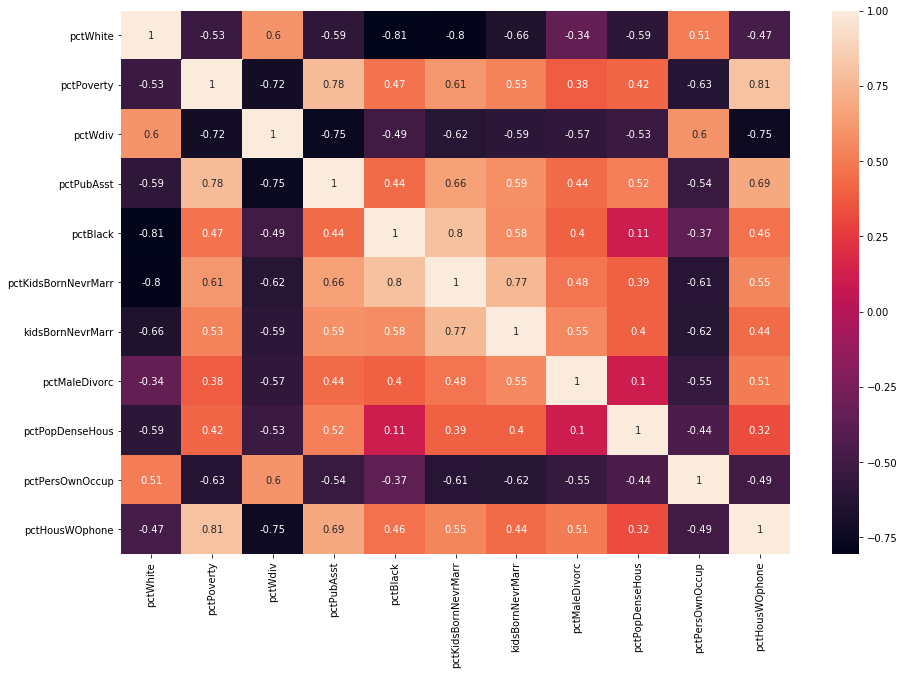

In [73]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(X[features].corr(), annot = True)
plt.show()

There are 9 unique pairs where the pair of features are correlated with each other with corr_coef > 0.7 or <-0.7.

In [74]:
corr = np.array(X[features].corr())

corr_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        if corr[i,j] >=0.7 or corr[i,j]<=-0.7:
            corr_pairs.append((features[i],features[j]))
            
len(corr_pairs)

9

In [75]:
corr_pairs

[('pctWhite', 'pctBlack'),
 ('pctWhite', 'pctKidsBornNevrMarr'),
 ('pctPoverty', 'pctWdiv'),
 ('pctPoverty', 'pctPubAsst'),
 ('pctPoverty', 'pctHousWOphone'),
 ('pctWdiv', 'pctPubAsst'),
 ('pctWdiv', 'pctHousWOphone'),
 ('pctBlack', 'pctKidsBornNevrMarr'),
 ('pctKidsBornNevrMarr', 'kidsBornNevrMarr')]

In [76]:
features.remove('pctWhite')

In [77]:
X = data[features]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

               feature        VIF
0           pctPoverty  13.407521
1              pctWdiv  32.107938
2           pctPubAsst  12.684292
3             pctBlack   5.406729
4  pctKidsBornNevrMarr  12.923259
5     kidsBornNevrMarr  48.825223
6        pctMaleDivorc  20.346039
7      pctPopDenseHous   2.682149
8      pctPersOwnOccup  35.579314
9       pctHousWOphone   8.726554


Even after removing some of the highly correlated pair of features there are 12 pairs of correlated features with corr coeff >=0.7 or <=-0.7. So, we should go for Ridge Regression.


## Dealing with outliers

In [78]:
data.reset_index(inplace = True)
data.index

RangeIndex(start=0, stop=1794, step=1)

In [79]:
'''outliers = {}
outliers_idxs = {}
for feature in features:
    q1 = np.percentile(data[feature].values,25)
    q2 = np.percentile(data[feature].values, 50)
    q3 = np.percentile(data[feature].values, 75)
    
    iqr = q3 - q1
    
    l1 = q2 - 4.5*iqr
    l2 = q2 + 4.5*iqr
    
    idxs = data[feature].apply(lambda x: False if l1<=x<=l2 else True)
    
    temp_idx = []
    for i,idx in enumerate(idxs):
        if idx==True:
            temp_idx.append(i)
    
    if temp_idx!=[]:
        outliers[feature] = len(temp_idx)
        outliers_idxs[feature] = temp_idx
        
outliers'''

'outliers = {}\noutliers_idxs = {}\nfor feature in features:\n    q1 = np.percentile(data[feature].values,25)\n    q2 = np.percentile(data[feature].values, 50)\n    q3 = np.percentile(data[feature].values, 75)\n    \n    iqr = q3 - q1\n    \n    l1 = q2 - 4.5*iqr\n    l2 = q2 + 4.5*iqr\n    \n    idxs = data[feature].apply(lambda x: False if l1<=x<=l2 else True)\n    \n    temp_idx = []\n    for i,idx in enumerate(idxs):\n        if idx==True:\n            temp_idx.append(i)\n    \n    if temp_idx!=[]:\n        outliers[feature] = len(temp_idx)\n        outliers_idxs[feature] = temp_idx\n        \noutliers'

In [80]:
'''i1 = outliers_idxs['kidsBornNevrMarr']
i2 = outliers_idxs['pctPopDenseHous']

idxs = list(set().union(i1,i2))
len(idxs)'''

#idxs = outliers_idxs['pctPopDenseHous']

"i1 = outliers_idxs['kidsBornNevrMarr']\ni2 = outliers_idxs['pctPopDenseHous']\n\nidxs = list(set().union(i1,i2))\nlen(idxs)"

We drop these 62 instances from our model building stage.

In [81]:
'''print (data.shape)

data.drop(idxs, axis = 0,inplace = True)

print (data.shape)'''

'print (data.shape)\n\ndata.drop(idxs, axis = 0,inplace = True)\n\nprint (data.shape)'

# Building Model

In [82]:
features

['pctPoverty',
 'pctWdiv',
 'pctPubAsst',
 'pctBlack',
 'pctKidsBornNevrMarr',
 'kidsBornNevrMarr',
 'pctMaleDivorc',
 'pctPopDenseHous',
 'pctPersOwnOccup',
 'pctHousWOphone']

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

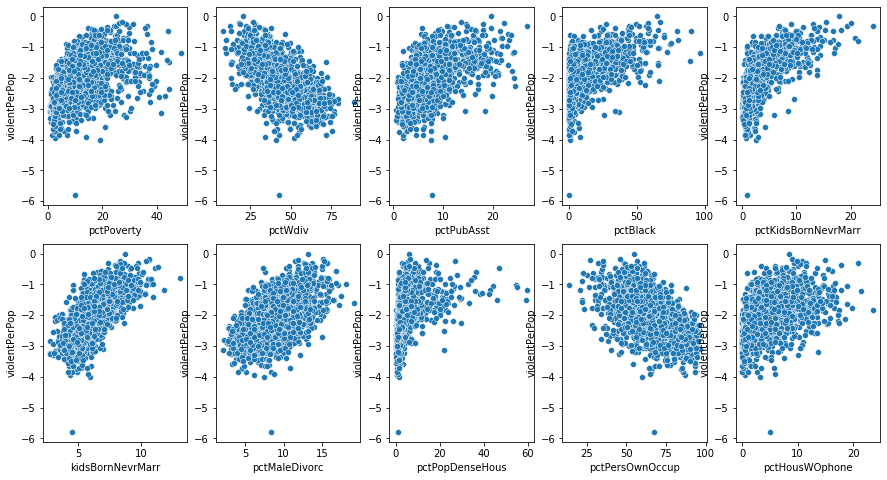

In [83]:
fig, axs = plt.subplots(2,5, figsize = (15, 8))

i = 0
j = 0

for feature in features:
    sns.scatterplot(feature, goal_variable, data = data, ax = axs[i,j])
    j+=1
    if j==5:
        i+=1
        j=0

The variable 'pctPoverty','pctBlack','pctPopDenseHous',  'pctKidsBornNevrMarr',  seems to have a quadratic associationship with the target variable. So we can include an artificial features  as the square values. 

In [84]:
data['pctPoverty2'] = np.power(data['pctPoverty'],2)
data['pctBlack2'] = np.power(data['pctBlack'],2)
data['pctPopDenseHous2'] = np.power(data['pctPopDenseHous'],2)
data['pctKidsBornNevrMarr2'] = np.power(data['pctKidsBornNevrMarr'],2)



features.append('pctPoverty2')
features.append('pctBlack2')
features.append('pctPopDenseHous2')
features.append('pctKidsBornNevrMarr2')

In [85]:
len(features)

14

In [86]:
from sklearn.model_selection import train_test_split, KFold

X = np.array(data[features])
y = np.array(data[goal_variable].values)

'''train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size = 0.15, shuffle = True, random_state = 42)
print (train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)'''

kf = KFold(n_splits = 5, shuffle = True)
splits = kf.get_n_splits(X)
splits

5

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso


In [88]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate_model(model, x_true, y_true):
    n = x_true.shape[0]
    p = x_true.shape[1]
    y_pred = model.predict(x_true)
    
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    r2_adjusted = 1 - ((1-r2)*((n-1)/(n-p-1)))
    
    mae = mean_absolute_error(y_true, y_pred)
    
    print ("RMSE:   %.4f" %rmse)
    print ("R2:     %.4f" %r2)
    print ("MAE:    %.4f" %mae)
    print ("Adj. R2 %.4f" %r2_adjusted)
    return (rmse, r2, mae, r2_adjusted)

### Least Squares Linear Regression

In [89]:
cv_rmse = []
cv_mae = []
cv_r2 = []
cv_r2_adj = []

split = 0
for train_index, valid_index in kf.split(X):
    print ("\nSplit %d" %(split+1))
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    valid_x = X[valid_index]
    valid_y = y[valid_index]
    
    train_x = StandardScaler().fit_transform(train_x)
    valid_x = StandardScaler().fit_transform(valid_x)
    
    model_lr = LinearRegression()
    model_lr.fit(train_x, train_y)

    
    print ("Training set:")
    _ = evaluate_model(model_lr, train_x, train_y)

    print ("\n\nValidation set:")
    rmse, r2, mae, r2_adj= evaluate_model(model_lr, valid_x, valid_y)
    
    cv_rmse.append(rmse)
    cv_r2.append(r2)
    cv_mae.append(mae)
    cv_r2_adj.append(r2_adj)
    
print ("\n\nCross validated Metrics:")
print ("RMSE  \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_rmse), np.std(cv_rmse)))
print ("R2    \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2), np.std(cv_r2)))
print ("MAE   \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_mae), np.std(cv_mae)))    
print ("R2 Adj\t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2_adj), np.std(cv_r2_adj)))


Split 1
Training set:
RMSE:   0.4150
R2:     0.6600
MAE:    0.3162
Adj. R2 0.6566


Validation set:
RMSE:   0.3852
R2:     0.6767
MAE:    0.3004
Adj. R2 0.6636

Split 2
Training set:
RMSE:   0.4099
R2:     0.6669
MAE:    0.3118
Adj. R2 0.6636


Validation set:
RMSE:   0.4126
R2:     0.6318
MAE:    0.3220
Adj. R2 0.6169

Split 3
Training set:
RMSE:   0.4144
R2:     0.6603
MAE:    0.3144
Adj. R2 0.6570


Validation set:
RMSE:   0.3862
R2:     0.6778
MAE:    0.3057
Adj. R2 0.6647

Split 4
Training set:
RMSE:   0.3997
R2:     0.6641
MAE:    0.3121
Adj. R2 0.6608


Validation set:
RMSE:   0.4450
R2:     0.6603
MAE:    0.3165
Adj. R2 0.6464

Split 5
Training set:
RMSE:   0.4009
R2:     0.6741
MAE:    0.3052
Adj. R2 0.6709


Validation set:
RMSE:   0.4367
R2:     0.6280
MAE:    0.3406
Adj. R2 0.6128


Cross validated Metrics:
RMSE  	 Mean: 0.4131 	 Std: 0.0248
R2    	 Mean: 0.6549 	 Std: 0.0214
MAE   	 Mean: 0.3170 	 Std: 0.0140
R2 Adj	 Mean: 0.6409 	 Std: 0.0222


### Ridge Regression

In [90]:
cv_rmse = []
cv_mae = []
cv_r2 = []
cv_r2_adj = []

split = 0
for train_index, valid_index in kf.split(X):
    print ("\nSplit %d" %(split+1))
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    valid_x = X[valid_index]
    valid_y = y[valid_index]
    
    train_x = StandardScaler().fit_transform(train_x)
    valid_x = StandardScaler().fit_transform(valid_x)
    
    model_lr = Ridge(alpha = 0.3)
    
    model_lr.fit(train_x, train_y)

    
    print ("Training set:")
    _ = evaluate_model(model_lr, train_x, train_y)

    print ("\n\nValidation set:")
    rmse, r2, mae, r2_adj= evaluate_model(model_lr, valid_x, valid_y)
    
    cv_rmse.append(rmse)
    cv_r2.append(r2)
    cv_mae.append(mae)
    cv_r2_adj.append(r2_adj)
    
print ("\n\nCross validated Metrics:")
print ("RMSE  \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_rmse), np.std(cv_rmse)))
print ("R2    \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2), np.std(cv_r2)))
print ("MAE   \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_mae), np.std(cv_mae)))    
print ("R2 Adj\t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2_adj), np.std(cv_r2_adj)))


Split 1
Training set:
RMSE:   0.4132
R2:     0.6586
MAE:    0.3144
Adj. R2 0.6553


Validation set:
RMSE:   0.3896
R2:     0.6866
MAE:    0.3050
Adj. R2 0.6739

Split 2
Training set:
RMSE:   0.3993
R2:     0.6717
MAE:    0.3071
Adj. R2 0.6685


Validation set:
RMSE:   0.4461
R2:     0.6329
MAE:    0.3341
Adj. R2 0.6179

Split 3
Training set:
RMSE:   0.4195
R2:     0.6549
MAE:    0.3205
Adj. R2 0.6515


Validation set:
RMSE:   0.3619
R2:     0.7062
MAE:    0.2808
Adj. R2 0.6943

Split 4
Training set:
RMSE:   0.4037
R2:     0.6737
MAE:    0.3109
Adj. R2 0.6705


Validation set:
RMSE:   0.4349
R2:     0.6042
MAE:    0.3248
Adj. R2 0.5881

Split 5
Training set:
RMSE:   0.4038
R2:     0.6668
MAE:    0.3062
Adj. R2 0.6636


Validation set:
RMSE:   0.4327
R2:     0.6422
MAE:    0.3405
Adj. R2 0.6276


Cross validated Metrics:
RMSE  	 Mean: 0.4130 	 Std: 0.0320
R2    	 Mean: 0.6544 	 Std: 0.0370
MAE   	 Mean: 0.3171 	 Std: 0.0217
R2 Adj	 Mean: 0.6404 	 Std: 0.0385


### Elastic Net

In [91]:
cv_rmse = []
cv_mae = []
cv_r2 = []
cv_r2_adj = []

split = 0
for train_index, valid_index in kf.split(X):
    print ("\nSplit %d" %(split+1))
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    valid_x = X[valid_index]
    valid_y = y[valid_index]
    
    model_lr = ElasticNet(alpha = 0.3)
    model_lr.fit(train_x, train_y)

    
    print ("Training set:")
    _ = evaluate_model(model_lr, train_x, train_y)

    print ("\n\nValidation set:")
    rmse, r2, mae, r2_adj= evaluate_model(model_lr, valid_x, valid_y)
    
    cv_rmse.append(rmse)
    cv_r2.append(r2)
    cv_mae.append(mae)
    cv_r2_adj.append(r2_adj)
    
print ("\n\nCross validated Metrics:")
print ("RMSE  \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_rmse), np.std(cv_rmse)))
print ("R2    \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2), np.std(cv_r2)))
print ("MAE   \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_mae), np.std(cv_mae)))    
print ("R2 Adj\t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2_adj), np.std(cv_r2_adj)))


Split 1
Training set:
RMSE:   0.4373
R2:     0.6192
MAE:    0.3354
Adj. R2 0.6155


Validation set:
RMSE:   0.4120
R2:     0.6438
MAE:    0.3261
Adj. R2 0.6294

Split 2
Training set:
RMSE:   0.4284
R2:     0.6309
MAE:    0.3352
Adj. R2 0.6273


Validation set:
RMSE:   0.4512
R2:     0.5900
MAE:    0.3293
Adj. R2 0.5733

Split 3
Training set:
RMSE:   0.4344
R2:     0.6163
MAE:    0.3347
Adj. R2 0.6125


Validation set:
RMSE:   0.4294
R2:     0.6428
MAE:    0.3309
Adj. R2 0.6282

Split 4
Training set:
RMSE:   0.4322
R2:     0.6238
MAE:    0.3323
Adj. R2 0.6201


Validation set:
RMSE:   0.4450
R2:     0.6035
MAE:    0.3478
Adj. R2 0.5874

Split 5
Training set:
RMSE:   0.4323
R2:     0.6246
MAE:    0.3318
Adj. R2 0.6209


Validation set:
RMSE:   0.4401
R2:     0.6083
MAE:    0.3477
Adj. R2 0.5923


Cross validated Metrics:
RMSE  	 Mean: 0.4355 	 Std: 0.0138
R2    	 Mean: 0.6177 	 Std: 0.0218
MAE   	 Mean: 0.3364 	 Std: 0.0094
R2 Adj	 Mean: 0.6021 	 Std: 0.0226


### Support Vector Regression 

In [92]:
from sklearn.svm import SVR
cv_rmse = []
cv_mae = []
cv_r2 = []
cv_r2_adj = []

split = 0
for train_index, valid_index in kf.split(X):
    print ("\nSplit %d" %(split+1))
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    valid_x = X[valid_index]
    valid_y = y[valid_index]
    
    train_x = StandardScaler().fit_transform(train_x)
    valid_x = StandardScaler().fit_transform(valid_x)
    
    model_lr = model = SVR(kernel = 'rbf',  C = 0.3, gamma = 'scale')
    model_lr.fit(train_x, train_y)

    
    print ("Training set:")
    _ = evaluate_model(model_lr, train_x, train_y)

    print ("\n\nValidation set:")
    rmse, r2, mae, r2_adj= evaluate_model(model_lr, valid_x, valid_y)
    
    cv_rmse.append(rmse)
    cv_r2.append(r2)
    cv_mae.append(mae)
    cv_r2_adj.append(r2_adj)
    
print ("\n\nCross validated Metrics:")
print ("RMSE  \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_rmse), np.std(cv_rmse)))
print ("R2    \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2), np.std(cv_r2)))
print ("MAE   \t Mean: %.4f \t Std: %.4f" %(np.mean(cv_mae), np.std(cv_mae)))    
print ("R2 Adj\t Mean: %.4f \t Std: %.4f" %(np.mean(cv_r2_adj), np.std(cv_r2_adj)))


Split 1
Training set:
RMSE:   0.3873
R2:     0.6995
MAE:    0.2902
Adj. R2 0.6965


Validation set:
RMSE:   0.4259
R2:     0.6293
MAE:    0.3238
Adj. R2 0.6142

Split 2
Training set:
RMSE:   0.3852
R2:     0.6996
MAE:    0.2920
Adj. R2 0.6966


Validation set:
RMSE:   0.4285
R2:     0.6392
MAE:    0.3209
Adj. R2 0.6245

Split 3
Training set:
RMSE:   0.3958
R2:     0.6923
MAE:    0.2962
Adj. R2 0.6893


Validation set:
RMSE:   0.3928
R2:     0.6547
MAE:    0.3034
Adj. R2 0.6406

Split 4
Training set:
RMSE:   0.3912
R2:     0.6870
MAE:    0.2920
Adj. R2 0.6839


Validation set:
RMSE:   0.4091
R2:     0.6840
MAE:    0.3210
Adj. R2 0.6712

Split 5
Training set:
RMSE:   0.3903
R2:     0.6918
MAE:    0.2921
Adj. R2 0.6888


Validation set:
RMSE:   0.4091
R2:     0.6707
MAE:    0.3140
Adj. R2 0.6573


Cross validated Metrics:
RMSE  	 Mean: 0.4131 	 Std: 0.0130
R2    	 Mean: 0.6556 	 Std: 0.0200
MAE   	 Mean: 0.3166 	 Std: 0.0074
R2 Adj	 Mean: 0.6415 	 Std: 0.0208


Least Square Linear Regression and SVR are giving the best cross validated estimates. However, due to the multicollinearity issue we should consider Ridge Estimate.

In [93]:
train_x.shape, train_y.shape

((1436, 14), (1436,))

In [94]:
alph= np.linspace(0.001,10,1000 )
alph

array([1.00000000e-03, 1.10090090e-02, 2.10180180e-02, 3.10270270e-02,
       4.10360360e-02, 5.10450450e-02, 6.10540541e-02, 7.10630631e-02,
       8.10720721e-02, 9.10810811e-02, 1.01090090e-01, 1.11099099e-01,
       1.21108108e-01, 1.31117117e-01, 1.41126126e-01, 1.51135135e-01,
       1.61144144e-01, 1.71153153e-01, 1.81162162e-01, 1.91171171e-01,
       2.01180180e-01, 2.11189189e-01, 2.21198198e-01, 2.31207207e-01,
       2.41216216e-01, 2.51225225e-01, 2.61234234e-01, 2.71243243e-01,
       2.81252252e-01, 2.91261261e-01, 3.01270270e-01, 3.11279279e-01,
       3.21288288e-01, 3.31297297e-01, 3.41306306e-01, 3.51315315e-01,
       3.61324324e-01, 3.71333333e-01, 3.81342342e-01, 3.91351351e-01,
       4.01360360e-01, 4.11369369e-01, 4.21378378e-01, 4.31387387e-01,
       4.41396396e-01, 4.51405405e-01, 4.61414414e-01, 4.71423423e-01,
       4.81432432e-01, 4.91441441e-01, 5.01450450e-01, 5.11459459e-01,
       5.21468468e-01, 5.31477477e-01, 5.41486486e-01, 5.51495495e-01,
      

In [95]:
X = StandardScaler().fit_transform(X)

In [96]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = alph, store_cv_values = True)
ridge_cv.fit(X,y)

RidgeCV(alphas=array([1.00000000e-03, 1.10090090e-02, 2.10180180e-02, 3.10270270e-02,
       4.10360360e-02, 5.10450450e-02, 6.10540541e-02, 7.10630631e-02,
       8.10720721e-02, 9.10810811e-02, 1.01090090e-01, 1.11099099e-01,
       1.21108108e-01, 1.31117117e-01, 1.41126126e-01, 1.51135135e-01,
       1.61144144e-01, 1.71153153e-01, 1.81162162e-01, 1.91171171e-01,
       2.01180180e-01, 2.11189189e-0...
       9.80982883e+00, 9.81983784e+00, 9.82984685e+00, 9.83985586e+00,
       9.84986486e+00, 9.85987387e+00, 9.86988288e+00, 9.87989189e+00,
       9.88990090e+00, 9.89990991e+00, 9.90991892e+00, 9.91992793e+00,
       9.92993694e+00, 9.93994595e+00, 9.94995495e+00, 9.95996396e+00,
       9.96997297e+00, 9.97998198e+00, 9.98999099e+00, 1.00000000e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [97]:
ridge_cv.alpha_

7.898108108108109

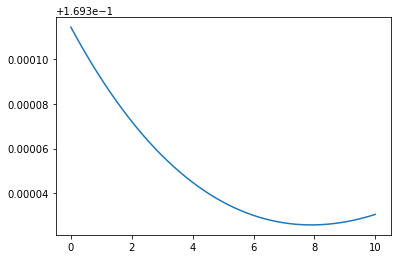

In [98]:
mse_cv = np.mean(ridge_cv.cv_values_,axis = 0)
plt.plot(alph, mse_cv)

In [99]:
'''
RMSE:   1.7238
R2:     0.6682
MAE:    1.3119
Adj. R2 0.6655'''

'\nRMSE:   1.7238\nR2:     0.6682\nMAE:    1.3119\nAdj. R2 0.6655'

In [100]:
model = Ridge(alpha = ridge_cv.alpha_)
model.fit(X,y)

evaluate_model(model, X,y)

RMSE:   0.4085
R2:     0.6644
MAE:    0.3121
Adj. R2 0.6617


(0.4084622135498913, 0.664363247850868, 0.3121161893701579, 0.6617219243376089)

## Train set metrics

In [101]:
train_y_actual.shape

(1794,)

In [102]:
train_pred = model.predict(X)
train_y_hat = np.exp(np.log((fitted_lambda * train_pred) + 1)/fitted_lambda) - delta

n = X.shape[0]
p = X.shape[1]

r2 = r2_score(train_y_actual, train_y_hat)
r2_adjusted = 1 - ((1-r2)*((n-1)/(n-p-1)))

rmse = np.sqrt(mean_squared_error(train_y_actual,train_y_hat))
mae = mean_absolute_error(train_y_actual,train_y_hat)

print ("Adjusted R2       = %.4f" %r2_adjusted)
print ("RMSE              = %.4f" %rmse)
print ("MAE               = %.4f" %mae)

Adjusted R2       = 0.6240
RMSE              = 0.0779
MAE               = 0.0481


In [103]:
coefs1 = model.coef_
coefs1

array([ 0.10506984, -0.03619559,  0.02843522,  0.30944824,  0.0576795 ,
        0.14922922,  0.16755948,  0.25188364, -0.0029162 , -0.02727096,
       -0.08385347, -0.17746395, -0.11759208, -0.01118935])

In [104]:
t = X.T @ X
t = t + (ridge_cv.alpha_ * np.identity(t.shape[0]))
np.linalg.inv(t)@X.T@y

array([ 0.10506984, -0.03619559,  0.02843522,  0.30944824,  0.0576795 ,
        0.14922922,  0.16755948,  0.25188364, -0.0029162 , -0.02727096,
       -0.08385347, -0.17746395, -0.11759208, -0.01118935])

In [105]:
ts = np.array([np.sqrt(t[i,i]) for i in range(t.shape[0])])
ts

array([42.4487704, 42.4487704, 42.4487704, 42.4487704, 42.4487704,
       42.4487704, 42.4487704, 42.4487704, 42.4487704, 42.4487704,
       42.4487704, 42.4487704, 42.4487704, 42.4487704])

# Checking Linear Regression Assumptions

1) Linearity: Plot of predicted vs residuals should not show any pattern. Correlation between residuals and predicted should be low:

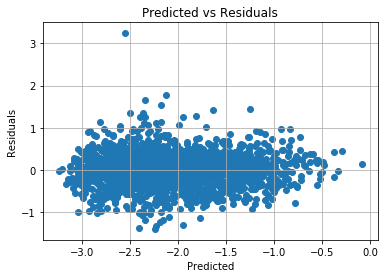

In [106]:
from scipy import stats
predicted = model.predict(X)
residuals = (predicted - y).astype(np.float64)

#print ("Correlation between residuals and predicted = %.4f" %(stats.stats.pearsonr(predicted, residuals)))

plt.scatter(predicted,residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.grid()
plt.show()

In [107]:
np.corrcoef(predicted,residuals)


array([[ 1.        , -0.00525736],
       [-0.00525736,  1.        ]])

The correlation coefficient between predicted and residuals is very low. So, assumption of linearity is ok.

2) Randomness:

We are going to use the randtest package in python which has a function random_score which returns True if the vector passed to the function is random else it returns False.

In [108]:
import randtest as rt
rt.random_score(residuals)

True

Thus, assumption of randomness is OK.

3) Homoskedasticity

In [109]:
from scipy.stats import bartlett
residuals_std = (residuals - np.mean(residuals))/np.std(residuals)
bartlett(residuals_std, np.random.randn(len(residuals)))

BartlettResult(statistic=0.049272201913502525, pvalue=0.8243345701666833)

Hence, we cannot reject the Null hypothesis of homoskedasticity for a 5% level of significance.

In [110]:
n = X.shape[0]
p = X.shape[1]

In [111]:
sigma_sq_estimated = np.sum(residuals**2)/(n-p)
sigma_estimated = np.sqrt(sigma_sq_estimated)

In [112]:
sigma_estimated

0.4100653795071087

4) Normality

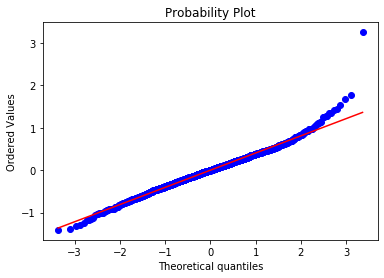

In [113]:
stats.probplot(residuals, plot = plt)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


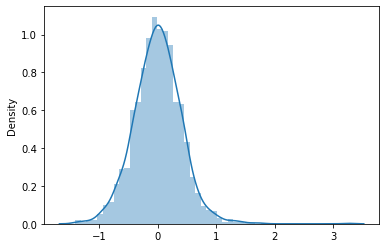

In [114]:
sns.distplot(residuals)

In [115]:
np.mean(residuals)

-1.1634444182248018e-17

In [116]:
stats.kstest(residuals, 'norm', (0,sigma_estimated))

KstestResult(statistic=0.02662438562062497, pvalue=0.1544209450926879)

With a pvalue greater than 0.05 we cannot reject the null hypothesis of normality for the residuals with a 5% significance level.

# Evaluating on unseen test data

Applying Box Cox Transformation of the test data

In [117]:
features

['pctPoverty',
 'pctWdiv',
 'pctPubAsst',
 'pctBlack',
 'pctKidsBornNevrMarr',
 'kidsBornNevrMarr',
 'pctMaleDivorc',
 'pctPopDenseHous',
 'pctPersOwnOccup',
 'pctHousWOphone',
 'pctPoverty2',
 'pctBlack2',
 'pctPopDenseHous2',
 'pctKidsBornNevrMarr2']

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


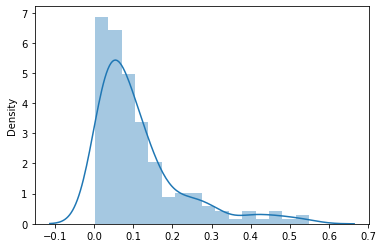

In [118]:
sns.distplot(test_data[goal_variable].values)

In [119]:
y = test_data[goal_variable].values.copy()

test_y = (np.power((y+delta),fitted_lambda) - 1)/fitted_lambda

test_data[goal_variable] = test_y

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


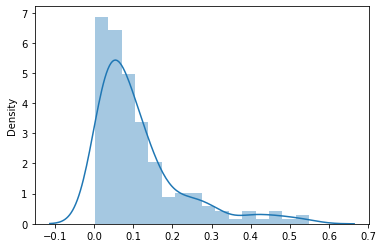

In [120]:
sns.distplot(y)

In [121]:
# Log transform on kidsBornNEvrMarr

test_data['kidsBornNevrMarr'] = test_data['kidsBornNevrMarr'].apply(lambda x:np.log(x+15))

# Engineered features
test_data['pctPoverty2'] = np.power(test_data['pctPoverty'],2)
test_data['pctBlack2'] = np.power(test_data['pctBlack'],2)
test_data['pctPopDenseHous2'] = np.power(test_data['pctPopDenseHous'],2)
test_data['pctKidsBornNevrMarr2'] = np.power(test_data['pctKidsBornNevrMarr'],2)


test_x = np.array(test_data[features])

test_x = StandardScaler().fit_transform(test_x)

y_hat = model.predict(test_x)


In [122]:
print ("RMSE:   %.4f" %(np.sqrt(mean_squared_error(test_y,y_hat))))
print ("R2:     %.4f" %(r2_score(test_y,y_hat)))
print ("MAE:    %.4f" %(mean_absolute_error(test_y, y_hat)))

RMSE:   0.4071
R2:     0.6110
MAE:    0.3137


In [123]:
conf_level = 90
Z_alpha = stats.norm(loc = 0, scale = sigma_estimated).ppf(conf_level/100)


In [124]:
y_hat = model.predict(test_x)
cl1 = y_hat - Z_alpha
cl2 = y_hat + Z_alpha

prediction_transformed = pd.DataFrame({'Actual': test_y, 'Predicted': y_hat, 'Lower{}'.format(conf_level):cl1,
                                       'Upper{}'.format(conf_level):cl2})

y_hat = np.exp(np.log((fitted_lambda * y_hat) + 1)/fitted_lambda) - delta

cl1 = np.exp(np.log((fitted_lambda * cl1) + 1)/fitted_lambda) - delta
cl2 = np.exp(np.log((fitted_lambda * cl2) + 1)/fitted_lambda) - delta

In [125]:
prediction_transformed

Actual  Predicted   Lower90   Upper90
0   -2.029699  -1.465000 -1.990519 -0.939480
1   -2.808539  -2.119975 -2.645495 -1.594455
2   -2.578692  -2.293200 -2.818720 -1.767680
3   -2.258515  -2.703027 -3.228547 -2.177507
4   -1.731567  -2.730021 -3.255541 -2.204501
..        ...        ...       ...       ...
195 -1.679062  -2.227097 -2.752617 -1.701578
196 -1.650938  -2.153331 -2.678851 -1.627812
197 -1.255607  -1.915813 -2.441333 -1.390293
198 -3.425685  -3.004747 -3.530267 -2.479227
199 -2.151782  -2.001317 -2.526837 -1.475797

[200 rows x 4 columns]

In [126]:
prediction = pd.DataFrame({'Actual': y, 'Predicted': y_hat, 'Lower{}'.format(conf_level):cl1,'Upper{}'.format(conf_level):cl2})
prediction

Actual  Predicted   Lower90   Upper90
0    0.082371   0.184905  0.087454  0.358907
1    0.021577   0.071584  0.029333  0.155114
2    0.033116   0.054144  0.021155  0.121565
3    0.057319   0.026369  0.008994  0.065340
4    0.128009   0.025067  0.008461  0.062571
..        ...        ...       ...       ...
195  0.137882   0.060327  0.024017  0.133574
196  0.143425   0.067907  0.027583  0.148119
197  0.243042   0.097868  0.042172  0.204152
198  0.005671   0.014572  0.004372  0.039491
199  0.068074   0.086028  0.036324  0.182252

[200 rows x 4 columns]

## Test Set Metrics

In [127]:

n = test_x.shape[0]
p = test_x.shape[1]
r2 = r2_score(y,y_hat)
adj_r2 = 1 - (1-r2)*((n-1)/(n-p-1))
rmse = np.sqrt(mean_squared_error(y,y_hat))
mae = mean_absolute_error(y,y_hat)
print ("R2 Score          = %.4f" %r2)
print ("Adjusted R2 Score = %.4f" %adj_r2)
print ("RMSE              = %.4f" %rmse)
print ("MAE               = %.4f" %mae)

R2 Score          = 0.6419
Adjusted R2 Score = 0.6148
RMSE              = 0.0663
MAE               = 0.0442


In [128]:
rmse**2

0.00439034458980746

## Comparing MAE of whole data with UCI best score of 0.096 from Redmond paper, and MSE of 0.0177 from paper "Predictive Modelling of Crime Data Set Using Data Mining"

In [129]:
features

['pctPoverty',
 'pctWdiv',
 'pctPubAsst',
 'pctBlack',
 'pctKidsBornNevrMarr',
 'kidsBornNevrMarr',
 'pctMaleDivorc',
 'pctPopDenseHous',
 'pctPersOwnOccup',
 'pctHousWOphone',
 'pctPoverty2',
 'pctBlack2',
 'pctPopDenseHous2',
 'pctKidsBornNevrMarr2']

In [130]:
all_data = pd.read_csv(data_unnormalized, header = None)
all_data.columns = attribute_names


all_data.replace('?',np.nan,inplace = True)
indexes = all_data[goal_variable].isna()
indexes = np.where(indexes==True)

all_data.drop(indexes[0], axis = 0, inplace = True)
all_data.shape

(1994, 147)

In [131]:
all_data[goal_variable].head()

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: violentPerPop, dtype: object

In [132]:
all_data[goal_variable] = all_data[goal_variable].astype(np.float64)
m = np.min(all_data[goal_variable])
M = np.max(all_data[goal_variable])

all_data[goal_variable] = all_data[goal_variable].apply(lambda x: (x-m)/(M-m))

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


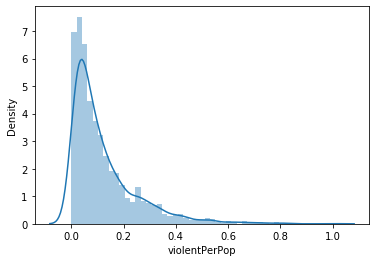

In [133]:
sns.distplot(all_data[goal_variable])

In [134]:
true_ys = all_data[goal_variable].values.copy()

all_data[goal_variable] = (np.power((all_data[goal_variable] + delta),fitted_lambda) - 1)/fitted_lambda

all_data['kidsBornNevrMarr'] = all_data['kidsBornNevrMarr'].apply(lambda x:np.log(x+15))

# Engineered features
all_data['pctPoverty2'] = np.power(all_data['pctPoverty'],2)
all_data['pctBlack2'] = np.power(all_data['pctBlack'],2)
all_data['pctPopDenseHous2'] = np.power(all_data['pctPopDenseHous'],2)
all_data['pctKidsBornNevrMarr2'] = np.power(all_data['pctKidsBornNevrMarr'],2)

In [135]:
X_all = np.array(all_data[features])
y_all = np.array(all_data[goal_variable].values)

X_all = StandardScaler().fit_transform(X_all)

kf = KFold(n_splits = 10, shuffle = True)
splits = kf.get_n_splits(X_all)

split = 0
maes = []
mses = []
r2s = []

for train_index, test_index in kf.split(X_all):
    split+=1
    
    train_x = X_all[train_index]
    train_y = y_all[train_index]
    
    #train_x = StandardScaler().fit_transform(train_x)
    train_y_true = true_ys[train_index]
    
    test_x = X_all[test_index]
    test_y = y_all[test_index]
    
    #test_x = StandardScaler().fit_transform(test_x)
    test_y_true = true_ys[test_index]
    
    
    model = Ridge(alpha = ridge_cv.alpha_ )
    model.fit(train_x, train_y)

    y_test_pred = model.predict(test_x)
    
    
    y_hat = np.exp(np.log((fitted_lambda * y_test_pred) + 1)/fitted_lambda) - delta


    mse = mean_squared_error(test_y_true,y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y_true,y_hat)
    
    x = test_x.shape[0]
    p = test_x.shape[1]
    
    r2 = r2_score(test_y_true, y_hat)
    
    
    
    print ("Split %d"%split)
    print ("R2 Score = %.4f, RMSE = %.4f,  MAE = %.4f" %(r2, rmse,mae))
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    
print ("\nMean Cross Validated MAE = %.4f" %(np.mean(maes)))
print ("\nMean MSE = %.4f" %(np.mean(mses)))
print ("\nMean R2 = %.4f" %(np.mean(r2s)))

Split 1
R2 Score = 0.6121, RMSE = 0.0790,  MAE = 0.0501
Split 2
R2 Score = 0.7404, RMSE = 0.0693,  MAE = 0.0454
Split 3
R2 Score = 0.5926, RMSE = 0.0843,  MAE = 0.0537
Split 4
R2 Score = 0.5613, RMSE = 0.0772,  MAE = 0.0466
Split 5
R2 Score = 0.6860, RMSE = 0.0727,  MAE = 0.0460
Split 6
R2 Score = 0.7105, RMSE = 0.0593,  MAE = 0.0376
Split 7
R2 Score = 0.6351, RMSE = 0.0854,  MAE = 0.0489
Split 8
R2 Score = 0.4623, RMSE = 0.0866,  MAE = 0.0544
Split 9
R2 Score = 0.6429, RMSE = 0.0750,  MAE = 0.0495
Split 10
R2 Score = 0.4870, RMSE = 0.0845,  MAE = 0.0496

Mean Cross Validated MAE = 0.0482

Mean MSE = 0.0060

Mean R2 = 0.6130


MAE of the model is better than the best model reported on UCI.
Also MSE of the model is better than the model given in the paper by P.Yerpude.

## Support Vector Regression 

In [136]:
X_all = np.array(all_data[features])
y_all = np.array(all_data[goal_variable].values)

X_all = StandardScaler().fit_transform(X_all)

kf = KFold(n_splits = 10, shuffle = True)
splits = kf.get_n_splits(X_all)

split = 0
maes = []
mses = []
r2s = []

for train_index, test_index in kf.split(X_all):
    split+=1
    
    train_x = X_all[train_index]
    train_y = y_all[train_index]
    
    #train_x = StandardScaler().fit_transform(train_x)
    train_y_true = true_ys[train_index]
    
    test_x = X_all[test_index]
    test_y = y_all[test_index]
    
    #test_x = StandardScaler().fit_transform(test_x)
    test_y_true = true_ys[test_index]
    
    
    model = SVR(kernel = 'linear', gamma = 'scale', C = 0.3 )
    model.fit(train_x, train_y)

    y_test_pred = model.predict(test_x)
    
    
    y_hat = np.exp(np.log((fitted_lambda * y_test_pred) + 1)/fitted_lambda) - delta


    mse = mean_squared_error(test_y_true,y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y_true,y_hat)
    
    x = test_x.shape[0]
    p = test_x.shape[1]
    
    r2 = r2_score(test_y_true, y_hat)
    
    
    
    print ("Split %d"%split)
    print ("R2 Score = %.4f, RMSE = %.4f,  MAE = %.4f" %(r2, rmse,mae))
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    
print ("\nMean Cross Validated MAE = %.4f" %(np.mean(maes)))
print ("\nMean MSE = %.4f" %(np.mean(mses)))
print ("\nMean R2 = %.4f" %(np.mean(r2s)))

Split 1
R2 Score = 0.5326, RMSE = 0.0812,  MAE = 0.0522
Split 2
R2 Score = 0.5395, RMSE = 0.0940,  MAE = 0.0545
Split 3
R2 Score = 0.6758, RMSE = 0.0696,  MAE = 0.0434
Split 4
R2 Score = 0.7154, RMSE = 0.0774,  MAE = 0.0504
Split 5
R2 Score = 0.5364, RMSE = 0.0901,  MAE = 0.0553
Split 6
R2 Score = 0.6538, RMSE = 0.0698,  MAE = 0.0437
Split 7
R2 Score = 0.6241, RMSE = 0.0721,  MAE = 0.0442
Split 8
R2 Score = 0.6646, RMSE = 0.0668,  MAE = 0.0441
Split 9
R2 Score = 0.5027, RMSE = 0.0732,  MAE = 0.0469
Split 10
R2 Score = 0.6730, RMSE = 0.0795,  MAE = 0.0487

Mean Cross Validated MAE = 0.0483

Mean MSE = 0.0061

Mean R2 = 0.6118


## Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor

X_all = np.array(all_data[features])
y_all = np.array(all_data[goal_variable].values)

X_all = StandardScaler().fit_transform(X_all)

kf = KFold(n_splits = 10, shuffle = True)
splits = kf.get_n_splits(X_all)

split = 0
maes = []
mses = []
r2s = []

for train_index, test_index in kf.split(X_all):
    split+=1
    
    train_x = X_all[train_index]
    train_y = y_all[train_index]
    
    #train_x = StandardScaler().fit_transform(train_x)
    train_y_true = true_ys[train_index]
    
    test_x = X_all[test_index]
    test_y = y_all[test_index]
    
    #test_x = StandardScaler().fit_transform(test_x)
    test_y_true = true_ys[test_index]
    
    
    model = RandomForestRegressor()
    model.fit(train_x, train_y)

    y_test_pred = model.predict(test_x)
    
    
    y_hat = np.exp(np.log((fitted_lambda * y_test_pred) + 1)/fitted_lambda) - delta


    mse = mean_squared_error(test_y_true,y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y_true,y_hat)
    
    x = test_x.shape[0]
    p = test_x.shape[1]
    
    r2 = r2_score(test_y_true, y_hat)
    
    
    
    print ("Split %d"%split)
    print ("R2 Score = %.4f, RMSE = %.4f,  MAE = %.4f" %(r2, rmse,mae))
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    
print ("\nMean Cross Validated MAE = %.4f" %(np.mean(maes)))
print ("\nMean MSE = %.4f" %(np.mean(mses)))
print ("\nMean R2 = %.4f" %(np.mean(r2s)))

Split 1
R2 Score = 0.5243, RMSE = 0.0934,  MAE = 0.0545
Split 2
R2 Score = 0.6005, RMSE = 0.0813,  MAE = 0.0493
Split 3
R2 Score = 0.4882, RMSE = 0.0753,  MAE = 0.0460
Split 4
R2 Score = 0.5648, RMSE = 0.0682,  MAE = 0.0430
Split 5
R2 Score = 0.6357, RMSE = 0.0800,  MAE = 0.0488
Split 6
R2 Score = 0.6483, RMSE = 0.0846,  MAE = 0.0512
Split 7
R2 Score = 0.6615, RMSE = 0.0752,  MAE = 0.0469
Split 8
R2 Score = 0.6470, RMSE = 0.0750,  MAE = 0.0465
Split 9
R2 Score = 0.6158, RMSE = 0.0761,  MAE = 0.0486
Split 10
R2 Score = 0.5800, RMSE = 0.0812,  MAE = 0.0504

Mean Cross Validated MAE = 0.0485

Mean MSE = 0.0063

Mean R2 = 0.5966
